In [332]:
import os
import requests
import json
import pprint
import pandas as pd
from pandas import json_normalize

In [333]:
bikes_df = pd.read_csv('../data/city_bikes.csv')
bikes_df['ll'] = bikes_df['latitude'].astype(str) + '%2C' + bikes_df['longitude'].astype(str)
bikes_df.head()
# foursquare is really sensitive about latitude and longitude, so added a column that has them already formatted for the fsq api format

,latitude,longitude,total_bikes,id,ll
0,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b,41.765862%2C-87.614787
1,41.870959,-87.700259,8,3b5764e0f031bd56d4b7985250805270,41.870959%2C-87.700259
2,41.666395,-87.619933,1,4067cf8e05861b94b7f003d1c2955f07,41.666395%2C-87.619933
3,41.775144,-87.708129,15,a08a288f5a66216ca4bc4091dd34f94c,41.775144%2C-87.708129
4,41.942423,-87.747130,1,b7013ce71928ecee4dec9478a2d4fce6,41.9424235%2C-87.74713


### A quick note:
- My computer had a really hard time going through so many loops and API requests, despite exceeding the basic requirements for the course
- I did every category separately to save my computer from crashing, which has lead to a pretty large notebook
- I tried to clear repeat outputs, as well as grouped my code together for categories after the initial pull & parse, just to improve readability

# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [248]:
# FSQ API ID Info
foursquare_id = os.environ['FSQ_ID']
foursquare_secret = os.environ["FSQ_API"]

### Codes:
-   restaurant : 13065 
-   ice cream parlour: 13046
-   museums : 10028
-   parks : 16032
-   bookstore : 17018

In [13]:
# function for pulling fsq information
# decided to do a pull of 10 for each category as opposed to one pull of 50
# this guarantees I get a mix of all of my categories, as opposed to a majority of one over the other

# restaurant : 13065 
def fsq_locations_resto(lat_lon):
       
    # construct url
    url= "https://api.foursquare.com/v3/places/search?ll=" + lat_lon + "&radius=1000&categories=13065&&fields=name%2Cgeocodes%2Ccategories%2Cdistance%2Crating%2Cpopularity%2Cprice%2Chours%2Chours_popular&sort=DISTANCE&limit=10"
    
    # create dictionary for headers
    headers = {"Accept": "application/json",
              'Authorization' : foursquare_secret}    
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    fsq_response = json.loads(response.text)
    fsq_data_resto.append(fsq_response)
    
    #print(response)   


In [ ]:
# making sure above get works

#fsq_data_resto = []
# fsq_locations_resto(bikes_df['ll'][0])

In [7]:
# loop for pulling fsq info
num_rows = bikes_df.shape[0]
row_count = 0

# making a place to save the file
#fsq_data_resto = []
fsq_data_ice_cream = []
fsq_data_museum = []
fsq_data_park = []
fsq_data_books = []

while row_count < num_rows:
    fsq_locations_resto(bikes_df.iloc[row_count,4])
    fsq_locations_ice_cream(bikes_df.iloc[row_count,4])
    fsq_locations_museum(bikes_df.iloc[row_count,4])
    fsq_locations_park(bikes_df.iloc[row_count,4])
    fsq_locations_books(bikes_df.iloc[row_count,4])
    row_count += 1

In [249]:
# repeating with other categories

# ice cream parlour: 13046
def fsq_locations_ice_cream(lat_lon):
       
    # construct url
    url= "https://api.foursquare.com/v3/places/search?ll=" + lat_lon + "&radius=1000&categories=13046&fields=name%2Cgeocodes%2Ccategories%2Cdistance%2Crating%2Cpopularity%2Cprice%2Chours%2Chours_popular&sort=DISTANCE&limit=10"
    
    # create dictionary for headers
    headers = {"Accept": "application/json",
              'Authorization' : foursquare_secret}    
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    fsq_response = json.loads(response.text)
    fsq_data_ice_cream.append(fsq_response)

# museums : 10028
def fsq_locations_museum(lat_lon):
       
    # construct url
    url= "https://api.foursquare.com/v3/places/search?ll=" + lat_lon + "&radius=1000&categories=10028&fields=name%2Cgeocodes%2Ccategories%2Cdistance%2Crating%2Cpopularity%2Cprice%2Chours%2Chours_popular&sort=DISTANCE&limit=10"
    
    # create dictionary for headers
    headers = {"Accept": "application/json",
              'Authorization' : foursquare_secret}    
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    fsq_response = json.loads(response.text)
    fsq_data_museum.append(fsq_response)


# parks : 16032
def fsq_locations_park(lat_lon):
       
    # construct url
    url= "https://api.foursquare.com/v3/places/search?ll=" + lat_lon + "&radius=1000&categories=16032&fields=name%2Cgeocodes%2Ccategories%2Cdistance%2Crating%2Cpopularity%2Cprice%2Chours%2Chours_popular&sort=DISTANCE&limit=10"
    
    # create dictionary for headers
    headers = {"Accept": "application/json",
              'Authorization' : foursquare_secret}    
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    fsq_response = json.loads(response.text)
    fsq_data_park.append(fsq_response)


# bookstore : 17018
def fsq_locations_books(lat_lon):
       
    # construct url
    url= "https://api.foursquare.com/v3/places/search?ll=" + lat_lon + "&radius=1000&categories=17018&fields=name%2Cgeocodes%2Ccategories%2Cdistance%2Crating%2Cpopularity%2Cprice%2Chours%2Chours_popular&sort=DISTANCE&limit=10"
    
    # create dictionary for headers
    headers = {"Accept": "application/json",
              'Authorization' : foursquare_secret}    
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    fsq_response = json.loads(response.text)
    fsq_data_books.append(fsq_response)

In [250]:
# loop for pulling fsq info
num_rows = bikes_df.shape[0]
row_count = 0

# making a place to save the file
fsq_data_ice_cream = []
fsq_data_museum = []
fsq_data_park = []
fsq_data_books = []

while row_count < num_rows:
    fsq_locations_ice_cream(bikes_df.iloc[row_count,4])
    fsq_locations_museum(bikes_df.iloc[row_count,4])
    fsq_locations_park(bikes_df.iloc[row_count,4])
    fsq_locations_books(bikes_df.iloc[row_count,4])
    row_count += 1

In [251]:
# saving results as json files for convenience
with open('fsq_data_resto.json', 'w') as f:
    json.dump(fsq_data_resto, f)
with open('fsq_data_ice_cream.json', 'w') as f:
    json.dump(fsq_data_ice_cream, f)
with open('fsq_data_museum.json', 'w') as f:
    json.dump(fsq_data_museum, f)
with open('fsq_data_park.json', 'w') as f:
    json.dump(fsq_data_park, f)
with open('fsq_data_books.json', 'w') as f:
    json.dump(fsq_data_books, f)

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [334]:
with open('../data/fsq_data_resto.json') as f:
    fsq_data_resto = json.load(f)

In [ ]:
# starting with restaurant data
fsq_data_resto

In [ ]:
pprint.pprint(fsq_data_resto)

In [336]:
# json for the first location
fsq_data_resto[0]

{'results': [{'categories': [{'id': 13003,
     'name': 'Bar',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
      'suffix': '.png'}},
    {'id': 13303,
     'name': 'Mexican Restaurant',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
      'suffix': '.png'}}],
   'distance': 36,
   'geocodes': {'main': {'latitude': 41.765616, 'longitude': -87.614811}},
   'hours': {'display': 'Mon-Fri 9:00 AM-6:00 PM',
    'is_local_holiday': False,
    'open_now': False,
    'regular': [{'close': '1800', 'day': 1, 'open': '0900'},
     {'close': '1800', 'day': 2, 'open': '0900'},
     {'close': '1800', 'day': 3, 'open': '0900'},
     {'close': '1800', 'day': 4, 'open': '0900'},
     {'close': '1800', 'day': 5, 'open': '0900'}],
    'seasonal': []},
   'name': 'Inn',
   'popularity': 0.9670314200661294,
   'price': 2},
  {'categories': [{'id': 13344,
     'name': 'Southern / Soul Food Restaurant',
     'icon': {'prefix': 'https://ss3.

In [339]:
# geo location for 1st location
pd.json_normalize(fsq_data_resto[0]['context'])

,geo_bounds.circle.center.latitude,geo_bounds.circle.center.longitude,geo_bounds.circle.radius
0,41.765862,-87.614787,1000


In [340]:
# looking at json as dataframe
fsq_resto_df = pd.json_normalize(fsq_data_resto)
fsq_resto_df.head()

,results,context.geo_bounds.circle.center.latitude,context.geo_bounds.circle.center.longitude,context.geo_bounds.circle.radius
0,"[{'categories': [{'id': 13003, 'name': 'Bar', ...",41.765862,-87.614787,1000
1,"[{'categories': [{'id': 13031, 'name': 'Burger...",41.870959,-87.700259,1000
2,[],41.666395,-87.619933,1000
3,"[{'categories': [{'id': 13002, 'name': 'Bakery...",41.775144,-87.708129,1000
4,"[{'categories': [{'id': 13009, 'name': 'Cockta...",41.942423,-87.747130,1000


In [17]:
# categories = not super important. we know the base category already
pd.json_normalize(fsq_data_resto[0]['results'][0]['categories'])

,id,name,icon.prefix,icon.suffix
0,13003,Bar,https://ss3.4sqi.net/img/categories_v2/nightli...,.png
1,13303,Mexican Restaurant,https://ss3.4sqi.net/img/categories_v2/food/me...,.png


In [86]:
# looking at regular hours data, again, maybe not super useful
pd.json_normalize(fsq_data_resto[0]['results'][0]['hours']['regular'])

,close,day,open
0,1800,1,0900
1,1800,2,0900
2,1800,3,0900
3,1800,4,0900
4,1800,5,0900


In [138]:
# looking at results as a whole
pd.json_normalize(fsq_data_resto,['results'])

,categories,distance,name,popularity,price,geocodes.main.latitude,geocodes.main.longitude,hours.display,hours.is_local_holiday,hours.open_now,hours.regular,hours.seasonal,geocodes.roof.latitude,geocodes.roof.longitude,rating,hours_popular
0,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",36,Inn,0.967031,2.0,41.765616,-87.614811,Mon-Fri 9:00 AM-6:00 PM,False,False,"[{'close': '1800', 'day': 1, 'open': '0900'}, ...",[],NaN,NaN,NaN,NaN
1,"[{'id': 13344, 'name': 'Southern / Soul Food R...",45,Roy's Soul Food,0.892833,1.0,41.765560,-87.615083,Open Daily 7:00 AM-5:30 PM,False,True,"[{'close': '1730', 'day': 1, 'open': '0700'}, ...",[],41.765560,-87.615083,NaN,NaN
2,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",69,Sammy Submarine,NaN,NaN,41.765820,-87.615624,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN
3,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",70,Sunny Submarine,0.996738,1.0,41.765828,-87.615534,"Open Daily 12:00 AM-2:00 AM, 10:00 AM-11:59 PM",False,False,"[{'close': '0200', 'day': 1, 'open': '0000'}, ...",[],41.765828,-87.615534,NaN,NaN
4,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",180,Gold Post Lounge,NaN,NaN,41.765658,-87.612622,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,"[{'id': 13303, 'name': 'Mexican Restaurant', '...",840,Atardecer Acapulqueno,0.960868,1.0,41.852189,-87.699616,Mon-Fri 8:00 AM-8:00 PM; Sat 8:00 AM-9:00 PM; ...,False,True,"[{'close': '2000', 'day': 1, 'open': '0800'}, ...",[],41.852189,-87.699616,NaN,NaN
5493,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",850,Guerrero's Pizza,0.971262,1.0,41.854222,-87.695694,Open Daily 7:00 AM-11:00 PM,False,True,"[{'close': '2300', 'day': 1, 'open': '0700'}, ...",[],41.854222,-87.695694,NaN,NaN
5494,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",860,McDonald's,0.997545,1.0,41.866782,-87.706138,Open Daily 12:00 AM-11:59 PM,False,True,"[{'close': '2359', 'day': 1, 'open': '0000'}, ...",[],41.866782,-87.706138,5.0,"[{'close': '1200', 'day': 1, 'open': '0700'}, ..."
5495,"[{'id': 13297, 'name': 'Latin American Restaur...",864,El Mezquite Grill,0.992237,1.0,41.851495,-87.703539,Open Daily 9:00 AM-9:00 PM,False,True,"[{'close': '2100', 'day': 1, 'open': '0900'}, ...",[],41.851495,-87.703539,NaN,NaN


In [341]:
# useful information
# distance (from coordinates)
# popularity (0 to 1 scale, can convert to be 0-10 for nicer readability)
# price (0 - 4 scale, with 0 being cheap and 4 being very expensive)
# rating
resto_df = pd.json_normalize(fsq_data_resto,['results'])
resto_df.head()

,categories,distance,name,popularity,price,geocodes.main.latitude,geocodes.main.longitude,hours.display,hours.is_local_holiday,hours.open_now,hours.regular,hours.seasonal,geocodes.roof.latitude,geocodes.roof.longitude,rating,hours_popular
0,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",36,Inn,0.967031,2.0,41.765616,-87.614811,Mon-Fri 9:00 AM-6:00 PM,False,False,"[{'close': '1800', 'day': 1, 'open': '0900'}, ...",[],NaN,NaN,NaN,NaN
1,"[{'id': 13344, 'name': 'Southern / Soul Food R...",45,Roy's Soul Food,0.892833,1.0,41.765560,-87.615083,Open Daily 7:00 AM-5:30 PM,False,True,"[{'close': '1730', 'day': 1, 'open': '0700'}, ...",[],41.765560,-87.615083,NaN,NaN
2,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",69,Sammy Submarine,NaN,NaN,41.765820,-87.615624,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN
3,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",70,Sunny Submarine,0.996738,1.0,41.765828,-87.615534,"Open Daily 12:00 AM-2:00 AM, 10:00 AM-11:59 PM",False,False,"[{'close': '0200', 'day': 1, 'open': '0000'}, ...",[],41.765828,-87.615534,NaN,NaN
4,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",180,Gold Post Lounge,NaN,NaN,41.765658,-87.612622,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN


In [342]:
# exploding results column to make one table with all restaurant data
resto_exploded = fsq_resto_df.explode('results')
resto_exploded

,results,context.geo_bounds.circle.center.latitude,context.geo_bounds.circle.center.longitude,context.geo_bounds.circle.radius
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000
0,"{'categories': [{'id': 13344, 'name': 'Souther...",41.765862,-87.614787,1000
0,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000
0,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000
...,...,...,...,...
566,"{'categories': [{'id': 13303, 'name': 'Mexican...",41.859360,-87.703020,1000
566,"{'categories': [{'id': 13064, 'name': 'Pizzeri...",41.859360,-87.703020,1000
566,"{'categories': [{'id': 13031, 'name': 'Burger ...",41.859360,-87.703020,1000
566,"{'categories': [{'id': 13297, 'name': 'Latin A...",41.859360,-87.703020,1000


In [343]:
# adding ll column that will match bike info for joining later
resto_exploded['ll'] = resto_exploded['context.geo_bounds.circle.center.latitude'].astype(str) + '%2C' + resto_exploded['context.geo_bounds.circle.center.longitude'].astype(str)
resto_exploded

,results,context.geo_bounds.circle.center.latitude,context.geo_bounds.circle.center.longitude,context.geo_bounds.circle.radius,ll
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787
0,"{'categories': [{'id': 13344, 'name': 'Souther...",41.765862,-87.614787,1000,41.765862%2C-87.614787
0,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787
0,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787
...,...,...,...,...,...
566,"{'categories': [{'id': 13303, 'name': 'Mexican...",41.859360,-87.703020,1000,41.85936%2C-87.70302
566,"{'categories': [{'id': 13064, 'name': 'Pizzeri...",41.859360,-87.703020,1000,41.85936%2C-87.70302
566,"{'categories': [{'id': 13031, 'name': 'Burger ...",41.859360,-87.703020,1000,41.85936%2C-87.70302
566,"{'categories': [{'id': 13297, 'name': 'Latin A...",41.859360,-87.703020,1000,41.85936%2C-87.70302


In [344]:
# flattening above 'results' from above df 
# now we have one dataframe with location info, and one with all other POI info
result_df = pd.json_normalize(resto_exploded['results'])
result_df

,categories,distance,name,popularity,price,geocodes.main.latitude,geocodes.main.longitude,hours.display,hours.is_local_holiday,hours.open_now,hours.regular,hours.seasonal,geocodes.roof.latitude,geocodes.roof.longitude,rating,hours_popular
0,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",36.0,Inn,0.967031,2.0,41.765616,-87.614811,Mon-Fri 9:00 AM-6:00 PM,False,False,"[{'close': '1800', 'day': 1, 'open': '0900'}, ...",[],NaN,NaN,NaN,NaN
1,"[{'id': 13344, 'name': 'Southern / Soul Food R...",45.0,Roy's Soul Food,0.892833,1.0,41.765560,-87.615083,Open Daily 7:00 AM-5:30 PM,False,True,"[{'close': '1730', 'day': 1, 'open': '0700'}, ...",[],41.765560,-87.615083,NaN,NaN
2,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",69.0,Sammy Submarine,NaN,NaN,41.765820,-87.615624,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN
3,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",70.0,Sunny Submarine,0.996738,1.0,41.765828,-87.615534,"Open Daily 12:00 AM-2:00 AM, 10:00 AM-11:59 PM",False,False,"[{'close': '0200', 'day': 1, 'open': '0000'}, ...",[],41.765828,-87.615534,NaN,NaN
4,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",180.0,Gold Post Lounge,NaN,NaN,41.765658,-87.612622,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,"[{'id': 13303, 'name': 'Mexican Restaurant', '...",840.0,Atardecer Acapulqueno,0.960868,1.0,41.852189,-87.699616,Mon-Fri 8:00 AM-8:00 PM; Sat 8:00 AM-9:00 PM; ...,False,True,"[{'close': '2000', 'day': 1, 'open': '0800'}, ...",[],41.852189,-87.699616,NaN,NaN
5500,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",850.0,Guerrero's Pizza,0.971262,1.0,41.854222,-87.695694,Open Daily 7:00 AM-11:00 PM,False,True,"[{'close': '2300', 'day': 1, 'open': '0700'}, ...",[],41.854222,-87.695694,NaN,NaN
5501,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",860.0,McDonald's,0.997545,1.0,41.866782,-87.706138,Open Daily 12:00 AM-11:59 PM,False,True,"[{'close': '2359', 'day': 1, 'open': '0000'}, ...",[],41.866782,-87.706138,5.0,"[{'close': '1200', 'day': 1, 'open': '0700'}, ..."
5502,"[{'id': 13297, 'name': 'Latin American Restaur...",864.0,El Mezquite Grill,0.992237,1.0,41.851495,-87.703539,Open Daily 9:00 AM-9:00 PM,False,True,"[{'close': '2100', 'day': 1, 'open': '0900'}, ...",[],41.851495,-87.703539,NaN,NaN


In [345]:
# making keys for a join since indexes don't match (exploded index is based on nested location)
resto_exploded['expl_key'] = 0
resto_exploded['expl_key'] = range(1, len(resto_exploded) + 1)
resto_exploded

,results,context.geo_bounds.circle.center.latitude,context.geo_bounds.circle.center.longitude,context.geo_bounds.circle.radius,ll,expl_key
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787,1
0,"{'categories': [{'id': 13344, 'name': 'Souther...",41.765862,-87.614787,1000,41.765862%2C-87.614787,2
0,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787,3
0,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787,4
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787,5
...,...,...,...,...,...,...
566,"{'categories': [{'id': 13303, 'name': 'Mexican...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5500
566,"{'categories': [{'id': 13064, 'name': 'Pizzeri...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5501
566,"{'categories': [{'id': 13031, 'name': 'Burger ...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5502
566,"{'categories': [{'id': 13297, 'name': 'Latin A...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5503


In [348]:
result_df['res_key'] = 0
result_df['res_key'] = range(1, len(result_df) + 1)
result_df

,categories,distance,name,popularity,price,geocodes.main.latitude,geocodes.main.longitude,hours.display,hours.is_local_holiday,hours.open_now,hours.regular,hours.seasonal,geocodes.roof.latitude,geocodes.roof.longitude,rating,hours_popular,res_key
0,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",36.0,Inn,0.967031,2.0,41.765616,-87.614811,Mon-Fri 9:00 AM-6:00 PM,False,False,"[{'close': '1800', 'day': 1, 'open': '0900'}, ...",[],NaN,NaN,NaN,NaN,1
1,"[{'id': 13344, 'name': 'Southern / Soul Food R...",45.0,Roy's Soul Food,0.892833,1.0,41.765560,-87.615083,Open Daily 7:00 AM-5:30 PM,False,True,"[{'close': '1730', 'day': 1, 'open': '0700'}, ...",[],41.765560,-87.615083,NaN,NaN,2
2,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",69.0,Sammy Submarine,NaN,NaN,41.765820,-87.615624,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN,3
3,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",70.0,Sunny Submarine,0.996738,1.0,41.765828,-87.615534,"Open Daily 12:00 AM-2:00 AM, 10:00 AM-11:59 PM",False,False,"[{'close': '0200', 'day': 1, 'open': '0000'}, ...",[],41.765828,-87.615534,NaN,NaN,4
4,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",180.0,Gold Post Lounge,NaN,NaN,41.765658,-87.612622,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,"[{'id': 13303, 'name': 'Mexican Restaurant', '...",840.0,Atardecer Acapulqueno,0.960868,1.0,41.852189,-87.699616,Mon-Fri 8:00 AM-8:00 PM; Sat 8:00 AM-9:00 PM; ...,False,True,"[{'close': '2000', 'day': 1, 'open': '0800'}, ...",[],41.852189,-87.699616,NaN,NaN,5500
5500,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",850.0,Guerrero's Pizza,0.971262,1.0,41.854222,-87.695694,Open Daily 7:00 AM-11:00 PM,False,True,"[{'close': '2300', 'day': 1, 'open': '0700'}, ...",[],41.854222,-87.695694,NaN,NaN,5501
5501,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",860.0,McDonald's,0.997545,1.0,41.866782,-87.706138,Open Daily 12:00 AM-11:59 PM,False,True,"[{'close': '2359', 'day': 1, 'open': '0000'}, ...",[],41.866782,-87.706138,5.0,"[{'close': '1200', 'day': 1, 'open': '0700'}, ...",5502
5502,"[{'id': 13297, 'name': 'Latin American Restaur...",864.0,El Mezquite Grill,0.992237,1.0,41.851495,-87.703539,Open Daily 9:00 AM-9:00 PM,False,True,"[{'close': '2100', 'day': 1, 'open': '0900'}, ...",[],41.851495,-87.703539,NaN,NaN,5503


In [349]:
# joining results dataframe with location dataframe
resto_df = resto_exploded.merge(result_df, left_on='expl_key', right_on='res_key')

In [350]:
resto_df

,results,context.geo_bounds.circle.center.latitude,context.geo_bounds.circle.center.longitude,context.geo_bounds.circle.radius,ll,expl_key,categories,distance,name,popularity,...,hours.display,hours.is_local_holiday,hours.open_now,hours.regular,hours.seasonal,geocodes.roof.latitude,geocodes.roof.longitude,rating,hours_popular,res_key
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787,1,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",36.0,Inn,0.967031,...,Mon-Fri 9:00 AM-6:00 PM,False,False,"[{'close': '1800', 'day': 1, 'open': '0900'}, ...",[],NaN,NaN,NaN,NaN,1
1,"{'categories': [{'id': 13344, 'name': 'Souther...",41.765862,-87.614787,1000,41.765862%2C-87.614787,2,"[{'id': 13344, 'name': 'Southern / Soul Food R...",45.0,Roy's Soul Food,0.892833,...,Open Daily 7:00 AM-5:30 PM,False,True,"[{'close': '1730', 'day': 1, 'open': '0700'}, ...",[],41.765560,-87.615083,NaN,NaN,2
2,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787,3,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",69.0,Sammy Submarine,NaN,...,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN,3
3,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787,4,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",70.0,Sunny Submarine,0.996738,...,"Open Daily 12:00 AM-2:00 AM, 10:00 AM-11:59 PM",False,False,"[{'close': '0200', 'day': 1, 'open': '0000'}, ...",[],41.765828,-87.615534,NaN,NaN,4
4,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787,5,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",180.0,Gold Post Lounge,NaN,...,NaN,False,False,NaN,[],NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,"{'categories': [{'id': 13303, 'name': 'Mexican...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5500,"[{'id': 13303, 'name': 'Mexican Restaurant', '...",840.0,Atardecer Acapulqueno,0.960868,...,Mon-Fri 8:00 AM-8:00 PM; Sat 8:00 AM-9:00 PM; ...,False,True,"[{'close': '2000', 'day': 1, 'open': '0800'}, ...",[],41.852189,-87.699616,NaN,NaN,5500
5500,"{'categories': [{'id': 13064, 'name': 'Pizzeri...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5501,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",850.0,Guerrero's Pizza,0.971262,...,Open Daily 7:00 AM-11:00 PM,False,True,"[{'close': '2300', 'day': 1, 'open': '0700'}, ...",[],41.854222,-87.695694,NaN,NaN,5501
5501,"{'categories': [{'id': 13031, 'name': 'Burger ...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5502,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",860.0,McDonald's,0.997545,...,Open Daily 12:00 AM-11:59 PM,False,True,"[{'close': '2359', 'day': 1, 'open': '0000'}, ...",[],41.866782,-87.706138,5.0,"[{'close': '1200', 'day': 1, 'open': '0700'}, ...",5502
5502,"{'categories': [{'id': 13297, 'name': 'Latin A...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5503,"[{'id': 13297, 'name': 'Latin American Restaur...",864.0,El Mezquite Grill,0.992237,...,Open Daily 9:00 AM-9:00 PM,False,True,"[{'close': '2100', 'day': 1, 'open': '0900'}, ...",[],41.851495,-87.703539,NaN,NaN,5503


In [351]:
# making final restaurant dataframe
resto_df['latitude'] = resto_df['context.geo_bounds.circle.center.latitude']
resto_df['longitude'] = resto_df['context.geo_bounds.circle.center.longitude']
resto_df['resto_key'] = resto_df['res_key']

# changing popularity to be a percentage for readability
resto_df['popularity'] = round((result_df['popularity'] * 10),2)
resto_df['poi_cat'] = "restaurant"
resto_df

,results,context.geo_bounds.circle.center.latitude,context.geo_bounds.circle.center.longitude,context.geo_bounds.circle.radius,ll,expl_key,categories,distance,name,popularity,...,hours.seasonal,geocodes.roof.latitude,geocodes.roof.longitude,rating,hours_popular,res_key,latitude,longitude,resto_key,poi_cat
0,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787,1,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",36.0,Inn,9.67,...,[],NaN,NaN,NaN,NaN,1,41.765862,-87.614787,1,restaurant
1,"{'categories': [{'id': 13344, 'name': 'Souther...",41.765862,-87.614787,1000,41.765862%2C-87.614787,2,"[{'id': 13344, 'name': 'Southern / Soul Food R...",45.0,Roy's Soul Food,8.93,...,[],41.765560,-87.615083,NaN,NaN,2,41.765862,-87.614787,2,restaurant
2,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787,3,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",69.0,Sammy Submarine,NaN,...,[],NaN,NaN,NaN,NaN,3,41.765862,-87.614787,3,restaurant
3,"{'categories': [{'id': 13039, 'name': 'Deli', ...",41.765862,-87.614787,1000,41.765862%2C-87.614787,4,"[{'id': 13039, 'name': 'Deli', 'icon': {'prefi...",70.0,Sunny Submarine,9.97,...,[],41.765828,-87.615534,NaN,NaN,4,41.765862,-87.614787,4,restaurant
4,"{'categories': [{'id': 13003, 'name': 'Bar', '...",41.765862,-87.614787,1000,41.765862%2C-87.614787,5,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",180.0,Gold Post Lounge,NaN,...,[],NaN,NaN,NaN,NaN,5,41.765862,-87.614787,5,restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,"{'categories': [{'id': 13303, 'name': 'Mexican...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5500,"[{'id': 13303, 'name': 'Mexican Restaurant', '...",840.0,Atardecer Acapulqueno,9.61,...,[],41.852189,-87.699616,NaN,NaN,5500,41.859360,-87.703020,5500,restaurant
5500,"{'categories': [{'id': 13064, 'name': 'Pizzeri...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5501,"[{'id': 13064, 'name': 'Pizzeria', 'icon': {'p...",850.0,Guerrero's Pizza,9.71,...,[],41.854222,-87.695694,NaN,NaN,5501,41.859360,-87.703020,5501,restaurant
5501,"{'categories': [{'id': 13031, 'name': 'Burger ...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5502,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",860.0,McDonald's,9.98,...,[],41.866782,-87.706138,5.0,"[{'close': '1200', 'day': 1, 'open': '0700'}, ...",5502,41.859360,-87.703020,5502,restaurant
5502,"{'categories': [{'id': 13297, 'name': 'Latin A...",41.859360,-87.703020,1000,41.85936%2C-87.70302,5503,"[{'id': 13297, 'name': 'Latin American Restaur...",864.0,El Mezquite Grill,9.92,...,[],41.851495,-87.703539,NaN,NaN,5503,41.859360,-87.703020,5503,restaurant


In [352]:
# making final resto df
resto_df = resto_df[['name','popularity','price','rating','distance','latitude','longitude','ll','poi_cat', 'resto_key']]
resto_df

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat,resto_key
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,1
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,2
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,3
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,4
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,5
...,...,...,...,...,...,...,...,...,...,...
5499,Atardecer Acapulqueno,9.61,1.0,NaN,840.0,41.859360,-87.703020,41.85936%2C-87.70302,restaurant,5500
5500,Guerrero's Pizza,9.71,1.0,NaN,850.0,41.859360,-87.703020,41.85936%2C-87.70302,restaurant,5501
5501,McDonald's,9.98,1.0,5.0,860.0,41.859360,-87.703020,41.85936%2C-87.70302,restaurant,5502
5502,El Mezquite Grill,9.92,1.0,NaN,864.0,41.859360,-87.703020,41.85936%2C-87.70302,restaurant,5503


In [ ]:
# comparing dataframes to make sure no data was lost
# row count is the same pre and post merge tables

In [353]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   categories               5497 non-null   object 
 1   distance                 5497 non-null   float64
 2   name                     5497 non-null   object 
 3   popularity               4292 non-null   float64
 4   price                    4037 non-null   float64
 5   geocodes.main.latitude   5497 non-null   float64
 6   geocodes.main.longitude  5497 non-null   float64
 7   hours.display            4848 non-null   object 
 8   hours.is_local_holiday   5497 non-null   object 
 9   hours.open_now           5497 non-null   object 
 10  hours.regular            4832 non-null   object 
 11  hours.seasonal           5497 non-null   object 
 12  geocodes.roof.latitude   4954 non-null   float64
 13  geocodes.roof.longitude  4954 non-null   float64
 14  rating                  

In [234]:
resto_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5504 entries, 0 to 566
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   results                                     5497 non-null   object 
 1   context.geo_bounds.circle.center.latitude   5504 non-null   float64
 2   context.geo_bounds.circle.center.longitude  5504 non-null   float64
 3   context.geo_bounds.circle.radius            5504 non-null   int64  
 4   ll                                          5504 non-null   object 
 5   expl_key                                    5504 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 430.0+ KB


In [354]:
#resto_df.info()
resto_df.describe()

,popularity,price,rating,distance,latitude,longitude,resto_key
count,4292.000000,4037.000000,2623.000000,5497.000000,5504.000000,5504.000000,5504.000000
mean,8.958157,1.490463,7.398894,361.377297,41.846093,-87.667152,2752.500000
std,1.943332,0.660526,1.064382,229.674396,0.093730,0.056577,1589.012272
min,0.060000,1.000000,4.400000,0.000000,41.648501,-87.833817,1.000000
25%,9.240000,1.000000,6.600000,180.000000,41.766120,-87.704115,1376.750000
50%,9.630000,1.000000,7.500000,334.000000,41.866554,-87.667747,2752.500000
75%,9.820000,2.000000,8.300000,504.000000,41.917741,-87.630851,4128.250000
max,10.000000,4.000000,9.400000,3439.000000,42.064313,-87.533531,5504.000000


In [ ]:
# repeating above process with other results

In [372]:
# importing parks json
with open('../data/fsq_data_park.json') as f:
    fsq_data_park = json.load(f)

In [ ]:
pprint.pprint(fsq_data_park)

In [ ]:
fsq_park_df = pd.json_normalize(fsq_data_park)
fsq_park_df.head()

In [ ]:
park_df = pd.json_normalize(fsq_data_park,['results'])
park_df.head()

In [ ]:
# exploding results column to make one table with all park data
parks_exploded = fsq_park_df.explode('results')
parks_exploded

In [ ]:
# adding 'll' column that will match bike info for joining later
parks_exploded['ll'] = parks_exploded['context.geo_bounds.circle.center.latitude'].astype(str) + '%2C' + parks_exploded['context.geo_bounds.circle.center.longitude'].astype(str)
parks_exploded

In [ ]:
# flattening above 'results' from above df 
parks_result_df = pd.json_normalize(parks_exploded['results'])
parks_result_df.head()

In [ ]:
# making keys for a join since indexes don't match (exploded index is based on nested location)
parks_exploded['expl_key'] = 0
parks_exploded['expl_key'] = range(1, len(parks_exploded) + 1)
parks_result_df['parks_key'] = 0
parks_result_df['parks_key'] = range(1, len(parks_result_df) + 1)

In [ ]:
# parks_exploded
#parks_result_df

In [ ]:
# joining results dataframe with location dataframe
parks_df = parks_exploded.merge(parks_result_df, left_on='expl_key', right_on='parks_key')

In [ ]:
# making final parks dataframe
parks_df['latitude'] = parks_df['context.geo_bounds.circle.center.latitude']
parks_df['longitude'] = parks_df['context.geo_bounds.circle.center.longitude']
# changing popularity to be a percentage for readability
parks_df['popularity'] = round((parks_df['popularity'] * 10),2)
parks_df['poi_cat'] = "parks"
parks_df = parks_df[['name', 'popularity','rating','distance','latitude','longitude','ll','poi_cat', 'parks_key']]
parks_df

In [ ]:
# importing ice cream json
with open('../data/fsq_data_ice_cream.json') as f:
    fsq_data_ice_cream = json.load(f)

In [ ]:
fsq_ice_cream_df = pd.json_normalize(fsq_data_ice_cream)
fsq_ice_cream_df.head()

In [ ]:
# exploding results column to make one table with all park data
ice_cream_exploded = fsq_ice_cream_df.explode('results')

In [ ]:
ice_cream_exploded

In [ ]:
# flattening above 'results' from above df 
ice_cream_result_df = pd.json_normalize(ice_cream_exploded['results'])

In [ ]:
# adding 'll' column that will match bike info for joining later
ice_cream_exploded['ll'] = ice_cream_exploded['context.geo_bounds.circle.center.latitude'].astype(str) + '%2C' + ice_cream_exploded['context.geo_bounds.circle.center.longitude'].astype(str)
# making keys for a join since indexes don't match (exploded index is based on nested location)
ice_cream_exploded['expl_key'] = 0
ice_cream_exploded['expl_key'] = range(1, len(ice_cream_exploded) + 1)
ice_cream_result_df['ice_cream_key'] = 0
ice_cream_result_df['ice_cream_key'] = range(1, len(ice_cream_result_df) + 1)

In [ ]:
# joining results dataframe with location dataframe
ice_cream_df = ice_cream_exploded.merge(ice_cream_result_df, left_on='expl_key', right_on='ice_cream_key')

In [ ]:
# making final parks dataframe
ice_cream_df['latitude'] = ice_cream_df['context.geo_bounds.circle.center.latitude']
ice_cream_df['longitude'] = ice_cream_df['context.geo_bounds.circle.center.longitude']

In [ ]:
# changing popularity to be a percentage for readability
ice_cream_df['popularity'] = round((ice_cream_result_df['popularity'] * 10),2)
ice_cream_df['poi_cat'] = "ice_cream"
ice_cream_df = ice_cream_df[['name','price','popularity', 'rating','distance','latitude','longitude','ll','poi_cat', 'ice_cream_key']]
ice_cream_df

In [ ]:
# importing museum json
with open('../data/fsq_data_museum.json') as f:
    fsq_data_museum = json.load(f)

In [ ]:
fsq_museum_df = pd.json_normalize(fsq_data_museum)
fsq_museum_df.head()

# exploding results column to make one table with all park data
museum_exploded = fsq_museum_df.explode('results')

# adding 'll' column that will match bike info for joining later
museum_exploded['ll'] = museum_exploded['context.geo_bounds.circle.center.latitude'].astype(str) + '%2C' + museum_exploded['context.geo_bounds.circle.center.longitude'].astype(str)

# flattening above 'results' from above df 
museum_result_df = pd.json_normalize(museum_exploded['results'])
# museum_result_df.head()

# making keys for a join since indexes don't match (exploded index is based on nested location)
museum_exploded['expl_key'] = 0
museum_exploded['expl_key'] = range(1, len(museum_exploded) + 1)
museum_result_df['museum_key'] = 0
museum_result_df['museum_key'] = range(1, len(museum_result_df) + 1)

# joining results dataframe with location dataframe
museum_df = museum_exploded.merge(museum_result_df, left_on='expl_key', right_on='museum_key')

# making final parks dataframe
museum_df['latitude'] = museum_df['context.geo_bounds.circle.center.latitude']
museum_df['longitude'] = museum_df['context.geo_bounds.circle.center.longitude']
# changing popularity to be a percentage for readability
museum_df['popularity'] = round((museum_df['popularity'] * 10),2)
museum_df['poi_cat'] = "museum"
museum_df = museum_df[['name','popularity','rating','distance','latitude','longitude','ll','poi_cat', 'museum_key']]
museum_df


In [ ]:
# importing bookstore json
with open('../data/fsq_data_books.json') as f:
    fsq_data_books = json.load(f)

In [ ]:
fsq_books_df = pd.json_normalize(fsq_data_books)
fsq_books_df.head()

In [ ]:
# exploding results column to make one table with all park data
books_exploded = fsq_books_df.explode('results')

# adding 'll' column that will match bike info for joining later
books_exploded['ll'] = books_exploded['context.geo_bounds.circle.center.latitude'].astype(str) + '%2C' + books_exploded['context.geo_bounds.circle.center.longitude'].astype(str)

# flattening above 'results' from above df 
books_result_df = pd.json_normalize(books_exploded['results'])
# books_result_df.head()

# making keys for a join since indexes don't match (exploded index is based on nested location)
books_exploded['expl_key'] = 0
books_exploded['expl_key'] = range(1, len(books_exploded) + 1)
books_result_df['books_key'] = 0
books_result_df['books_key'] = range(1, len(books_result_df) + 1)

# joining results dataframe with location dataframe
books_df = books_exploded.merge(books_result_df, left_on='expl_key', right_on='books_key')

# making final parks dataframe
books_df['latitude'] = books_df['context.geo_bounds.circle.center.latitude']
books_df['longitude'] = books_df['context.geo_bounds.circle.center.longitude']
# changing popularity to be a percentage for readability
books_df['popularity'] = round((books_df['popularity'] * 10),2)
books_df['poi_cat'] = "books"
books_df = books_df[['name','popularity','rating','distance','latitude','longitude','ll','poi_cat', 'books_key']]
books_df


In [ ]:
# saving results as csv's for safety
fsq_resto_df.to_csv('fsq_resto_df.csv', index=False)
fsq_ice_cream_df.to_csv('fsq_ice_cream_df.csv', index=False)
fsq_museum_df.to_csv('fsq_museum_df.csv', index=False)
parks_df.to_csv('fsq_parks_df.csv', index=False)
fsq_books_df.to_csv('fsq_books_df.csv', index=False)

Put your parsed results into a DataFrame

In [ ]:
# 5 dataframes to merge:
# resto_df - y
# ice_cream_df - y
# museum_df - y
# parks_df - y
# books_df - y


In [416]:
resto_df.head()

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat,resto_key
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,1
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,2
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,3
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,4
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant,5


In [417]:
parks_df.head()

,name,popularity,rating,distance,latitude,longitude,ll,poi_cat,parks_key
0,Meyering Park,9.91,NaN,186.0,41.765862,-87.614787,41.765862%2C-87.614787,parks,1
1,Magnolia Playlot Park,9.31,NaN,425.0,41.870959,-87.700259,41.870959%2C-87.700259,parks,2
2,Dogwood Park,9.53,NaN,443.0,41.870959,-87.700259,41.870959%2C-87.700259,parks,3
3,Altgeld Park,9.84,7.3,672.0,41.870959,-87.700259,41.870959%2C-87.700259,parks,4
4,Park No. 422,7.55,NaN,729.0,41.870959,-87.700259,41.870959%2C-87.700259,parks,5


In [418]:
ice_cream_df.head()

,name,price,popularity,rating,distance,latitude,longitude,ll,poi_cat,ice_cream_key
0,NaN,NaN,NaN,NaN,NaN,41.765862,-87.614787,41.765862%2C-87.614787,ice_cream,1
1,NaN,NaN,NaN,NaN,NaN,41.870959,-87.700259,41.870959%2C-87.700259,ice_cream,2
2,NaN,NaN,NaN,NaN,NaN,41.666395,-87.619933,41.666395%2C-87.619933,ice_cream,3
3,La Pilluelita de Michoacán,NaN,NaN,NaN,445.0,41.775144,-87.708129,41.775144%2C-87.708129,ice_cream,4
4,Los Pekes Ice Cream & Coffee Shop,NaN,NaN,NaN,848.0,41.775144,-87.708129,41.775144%2C-87.708129,ice_cream,5


In [419]:
museum_df.head()

,name,popularity,rating,distance,latitude,longitude,ll,poi_cat,museum_key
0,NaN,NaN,NaN,NaN,41.765862,-87.614787,41.765862%2C-87.614787,museum,1
1,NaN,NaN,NaN,NaN,41.870959,-87.700259,41.870959%2C-87.700259,museum,2
2,NaN,NaN,NaN,NaN,41.666395,-87.619933,41.666395%2C-87.619933,museum,3
3,NaN,NaN,NaN,NaN,41.775144,-87.708129,41.775144%2C-87.708129,museum,4
4,NaN,NaN,NaN,NaN,41.942423,-87.747130,41.9424235%2C-87.74713,museum,5


In [420]:
books_df.head()

,name,popularity,rating,distance,latitude,longitude,ll,poi_cat,books_key
0,NaN,NaN,NaN,NaN,41.765862,-87.614787,41.765862%2C-87.614787,books,1
1,NaN,NaN,NaN,NaN,41.870959,-87.700259,41.870959%2C-87.700259,books,2
2,NaN,NaN,NaN,NaN,41.666395,-87.619933,41.666395%2C-87.619933,books,3
3,NaN,NaN,NaN,NaN,41.775144,-87.708129,41.775144%2C-87.708129,books,4
4,Mimi's Bookstore,9.22,NaN,376.0,41.942423,-87.747130,41.9424235%2C-87.74713,books,5


In [421]:
print(resto_df.shape[0])
print(parks_df.shape[0])
print(ice_cream_df.shape[0])
print(museum_df.shape[0])
print(books_df.shape[0])

5504
3441
1885
812
1428


In [422]:
# should be 13070 rows
fsq_df = pd.concat([resto_df, parks_df, ice_cream_df, museum_df, books_df])
fsq_df.shape[0]

13070

In [423]:
fsq_df = fsq_df.drop(columns=["resto_key", "parks_key", "ice_cream_key", "museum_key", "books_key"])

In [424]:
fsq_df.head()
#fsq_df.info()

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant


In [425]:
# saving df
fsq_df.to_csv('fsq_df.csv', index=False)

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

#### yelp category ids:
-   restaurants: restaurants
-   museums : museums
-   ice cream parlour : icecream
-   parks : parks
-   bookstores : bookstores


In [120]:
# formatting lat/lon column 
bikes_df['ll_yelp'] = bikes_df['latitude'].astype(str) + '&longitude=' + bikes_df['longitude'].astype(str)
bikes_df.head()


,latitude,longitude,total_bikes,id,ll,lat_str,lon_str,ll_yelp
0,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b,41.765862%2C-87.614787,0,0,41.765862&longitude=-87.614787
1,41.870959,-87.700259,8,3b5764e0f031bd56d4b7985250805270,41.870959%2C-87.700259,0,0,41.870959&longitude=-87.700259
2,41.666395,-87.619933,1,4067cf8e05861b94b7f003d1c2955f07,41.666395%2C-87.619933,0,0,41.666395&longitude=-87.619933
3,41.775144,-87.708129,15,a08a288f5a66216ca4bc4091dd34f94c,41.775144%2C-87.708129,0,0,41.775144&longitude=-87.708129
4,41.942423,-87.747130,1,b7013ce71928ecee4dec9478a2d4fce6,41.9424235%2C-87.74713,0,0,41.9424235&longitude=-87.74713


In [103]:
#set the keys
yelp_id = os.environ['YELP_ID']
yelp_secret = os.environ["YELP_API"]

In [105]:
url = "https://api.yelp.com/v3/businesses/search?latitude=41.765862&longitude=-87.614787&radius=1000&limit=50&categories"

In [106]:
# Create dictionary for headers
# headers = {"Accept": "application/json"}

# Add key with our API KEY
headers= {'Authorization': 'Bearer ' + yelp_secret}
result = requests.get(url, headers=headers)
result

<Response [200]>

In [148]:
# function for pulling fsq information
# decided to do a pull of 10 for each category as opposed to one pull of 50
# this guarantees I get a mix of all of my categories, as opposed to a majority of one over the other

# restaurant : restaurants
def yelp_locations_resto(lat_lon):
       
    # construct url
    url= "https://api.yelp.com/v3/businesses/search?latitude=" + lat_lon + "&radius=1000&categories=restaurants&price=1,2,3,4&sort_by=distance&limit=10"
    
    # headers
    headers= {'Authorization': 'Bearer ' + yelp_secret}   
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    yelp_response = json.loads(response.text)
    yelp_data_resto.append(yelp_response)
    #print(yelp_response) 

In [149]:
# museums : museums
def yelp_locations_museums(lat_lon):
       
    # construct url
    url= "https://api.yelp.com/v3/businesses/search?latitude=" + lat_lon + "&radius=1000&categories=museums&price=1,2,3,4&sort_by=distance&limit=10"
    
    # headers
    headers= {'Authorization': 'Bearer ' + yelp_secret}   
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    yelp_response = json.loads(response.text)
    yelp_data_museums.append(yelp_response)

# ice cream parlour : icecream
def yelp_locations_icecream(lat_lon):
       
    # construct url
    url= "https://api.yelp.com/v3/businesses/search?latitude=" + lat_lon + "&radius=1000&categories=icecream&price=1,2,3,4&sort_by=distance&limit=10"
    
    # headers
    headers= {'Authorization': 'Bearer ' + yelp_secret}   
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    yelp_response = json.loads(response.text)
    yelp_data_icecream.append(yelp_response)

# parks : parks
def yelp_locations_parks(lat_lon):
       
    # construct url
    url= "https://api.yelp.com/v3/businesses/search?latitude=" + lat_lon + "&radius=1000&categories=parks&price=1,2,3,4&sort_by=distance&limit=10"
    
    # headers
    headers= {'Authorization': 'Bearer ' + yelp_secret}   
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    yelp_response = json.loads(response.text)
    yelp_data_parks.append(yelp_response)

# bookstores : bookstores
def yelp_locations_books(lat_lon):
       
    # construct url
    url= "https://api.yelp.com/v3/businesses/search?latitude=" + lat_lon + "&radius=1000&categories=bookstores&price=1,2,3,4&sort_by=distance&limit=10"
    
    # headers
    headers= {'Authorization': 'Bearer ' + yelp_secret}   
        
    # perform get request
    response = requests.get(url, headers=headers)

    # process request into usable JSON file
    yelp_response = json.loads(response.text)
    yelp_data_books.append(yelp_response)
    

In [ ]:
# making sure above get works

yelp_data_resto = []
lat_lon = bikes_df['ll_yelp'][0]
yelp_locations_resto(lat_lon)

In [150]:
# loop for pulling yelp info
num_rows = bikes_df.shape[0]
row_count = 0

# making a place to save the file
#yelp_data_resto = []
#yelp_data_icecream = []
#yelp_data_museums = []
#yelp_data_parks = []
yelp_data_books = []

while row_count < num_rows:
    #yelp_locations_resto(bikes_df.iloc[row_count,5])
    #yelp_locations_icecream(bikes_df.iloc[row_count,5])
    #yelp_locations_museums(bikes_df.iloc[row_count,5])
    #yelp_locations_parks(bikes_df.iloc[row_count,5])
    yelp_locations_books(bikes_df.iloc[row_count,5])
    row_count += 1

In [ ]:
# starting with restaurant data

yelp_data_resto

In [152]:
# saving results as json files for convenience

with open('yelp_data_resto.json', 'w') as f:
    json.dump(yelp_data_resto, f)
with open('yelp_data_icecream.json', 'w') as f:
    json.dump(yelp_data_icecream, f)
with open('yelp_data_museums.json', 'w') as f:
    json.dump(yelp_data_museums, f)
with open('yelp_data_parks.json', 'w') as f:
    json.dump(yelp_data_parks, f)
with open('yelp_data_books.json', 'w') as f:
    json.dump(yelp_data_books, f)

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [172]:
with open('../data/yelp_data_resto.json') as f:
    yelp_data_resto = json.load(f)

In [ ]:
pprint.pprint(yelp_data_resto)

In [184]:
# total is nice
# pd.json_normalize(yelp_data_resto).head()
yelp_resto_df = pd.json_normalize(yelp_data_resto)

In [179]:
# investigating json
pd.json_normalize(yelp_data_resto,['businesses']).head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,LXRqpg5VEvKw1ijdg7pJZw,roys-soul-food-chicago,Roy's Soul Food,https://s3-media4.fl.yelpcdn.com/bphoto/7hJd1v...,False,https://www.yelp.com/biz/roys-soul-food-chicag...,19,"[{'alias': 'soulfood', 'title': 'Soul Food'}]",3.5,"[delivery, pickup]",...,41.765585,-87.615008,403 E 71st St,,,Chicago,60619,US,IL,"[403 E 71st St, Chicago, IL 60619]"
1,32h9LalsEUYoOy0tB4G94A,sunny-sub-chicago-3,Sunny Sub,https://s3-media2.fl.yelpcdn.com/bphoto/9ZRMe8...,False,https://www.yelp.com/biz/sunny-sub-chicago-3?a...,7,"[{'alias': 'newamerican', 'title': 'American (...",3.5,"[delivery, pickup]",...,41.765930,-87.615570,380 E 71st St,,,Chicago,60619,US,IL,"[380 E 71st St, Chicago, IL 60619]"
2,VG2ZvFPUZLA3_SoxMZVnWQ,uncle-don-rays-chicago,Uncle Don Ray's,https://s3-media2.fl.yelpcdn.com/bphoto/Uy9Z4q...,False,https://www.yelp.com/biz/uncle-don-rays-chicag...,2,"[{'alias': 'bbq', 'title': 'Barbeque'}]",1.5,[],...,41.769252,-87.617170,337 E 69th St,,,Chicago,60637,US,IL,"[337 E 69th St, Chicago, IL 60637]"
3,Avz3t04QfQ6303ju88k1Kg,southtown-sub-chicago,Southtown Sub,https://s3-media1.fl.yelpcdn.com/bphoto/mrjbML...,False,https://www.yelp.com/biz/southtown-sub-chicago...,35,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.0,"[delivery, pickup]",...,41.765753,-87.620979,112 E 71 St.,,,Chicago,60619,US,IL,"[112 E 71 St., Chicago, IL 60619]"
4,5Qdne8qUjicOVDcp8piA-Q,babas-famous-steak-and-lemonade-chicago,Baba's Famous Steak & Lemonade,,False,https://www.yelp.com/biz/babas-famous-steak-an...,4,"[{'alias': 'steak', 'title': 'Steakhouses'}]",2.5,[],...,41.765300,-87.622154,7100 S Michigan Ave,,,Chicago,60619,US,IL,"[7100 S Michigan Ave, Chicago, IL 60619]"


In [ ]:
# columns that can be dropped:
# id, alias, image_url, is_closed, url, review_count, categories, transactions, 
#coordinates.latitude, coordinates,longitude,location.address1, location.address2, 
#location.address3, location.city, location.zip_code, location_country, 
#location.state, location.display_address 

# a lot of these provide good information, but aren't neccessary for this specific project

In [188]:
# exploding results so that we have one table with all info
yelp_resto_expl = yelp_resto_df.explode('businesses')
yelp_resto_expl.head()

,businesses,total,region.center.longitude,region.center.latitude
0,"{'id': 'LXRqpg5VEvKw1ijdg7pJZw', 'alias': 'roy...",18,-87.614787,41.765862
0,"{'id': '32h9LalsEUYoOy0tB4G94A', 'alias': 'sun...",18,-87.614787,41.765862
0,"{'id': 'VG2ZvFPUZLA3_SoxMZVnWQ', 'alias': 'unc...",18,-87.614787,41.765862
0,"{'id': 'Avz3t04QfQ6303ju88k1Kg', 'alias': 'sou...",18,-87.614787,41.765862
0,"{'id': '5Qdne8qUjicOVDcp8piA-Q', 'alias': 'bab...",18,-87.614787,41.765862


In [189]:
# adding ll column that will match bike info for joining later
yelp_resto_expl['ll'] = yelp_resto_expl['region.center.latitude'].astype(str) + '%2C' + yelp_resto_expl['region.center.longitude'].astype(str)
yelp_resto_expl.head()

,businesses,total,region.center.longitude,region.center.latitude,ll
0,"{'id': 'LXRqpg5VEvKw1ijdg7pJZw', 'alias': 'roy...",18,-87.614787,41.765862,41.765862%2C-87.614787
0,"{'id': '32h9LalsEUYoOy0tB4G94A', 'alias': 'sun...",18,-87.614787,41.765862,41.765862%2C-87.614787
0,"{'id': 'VG2ZvFPUZLA3_SoxMZVnWQ', 'alias': 'unc...",18,-87.614787,41.765862,41.765862%2C-87.614787
0,"{'id': 'Avz3t04QfQ6303ju88k1Kg', 'alias': 'sou...",18,-87.614787,41.765862,41.765862%2C-87.614787
0,"{'id': '5Qdne8qUjicOVDcp8piA-Q', 'alias': 'bab...",18,-87.614787,41.765862,41.765862%2C-87.614787


In [191]:
# checking rows
yelp_resto_expl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5097 entries, 0 to 566
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   businesses               5091 non-null   object 
 1   total                    5097 non-null   int64  
 2   region.center.longitude  5097 non-null   float64
 3   region.center.latitude   5097 non-null   float64
 4   ll                       5097 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 238.9+ KB


In [ ]:
# flattening 'businesses' from above df

In [218]:
yelp_resto_biz = pd.json_normalize(yelp_resto_expl['businesses'])
yelp_resto_biz.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,LXRqpg5VEvKw1ijdg7pJZw,roys-soul-food-chicago,Roy's Soul Food,https://s3-media4.fl.yelpcdn.com/bphoto/7hJd1v...,False,https://www.yelp.com/biz/roys-soul-food-chicag...,19.0,"[{'alias': 'soulfood', 'title': 'Soul Food'}]",3.5,"[delivery, pickup]",...,41.765585,-87.615008,403 E 71st St,,,Chicago,60619,US,IL,"[403 E 71st St, Chicago, IL 60619]"
1,32h9LalsEUYoOy0tB4G94A,sunny-sub-chicago-3,Sunny Sub,https://s3-media2.fl.yelpcdn.com/bphoto/9ZRMe8...,False,https://www.yelp.com/biz/sunny-sub-chicago-3?a...,7.0,"[{'alias': 'newamerican', 'title': 'American (...",3.5,"[delivery, pickup]",...,41.765930,-87.615570,380 E 71st St,,,Chicago,60619,US,IL,"[380 E 71st St, Chicago, IL 60619]"
2,VG2ZvFPUZLA3_SoxMZVnWQ,uncle-don-rays-chicago,Uncle Don Ray's,https://s3-media2.fl.yelpcdn.com/bphoto/Uy9Z4q...,False,https://www.yelp.com/biz/uncle-don-rays-chicag...,2.0,"[{'alias': 'bbq', 'title': 'Barbeque'}]",1.5,[],...,41.769252,-87.617170,337 E 69th St,,,Chicago,60637,US,IL,"[337 E 69th St, Chicago, IL 60637]"
3,Avz3t04QfQ6303ju88k1Kg,southtown-sub-chicago,Southtown Sub,https://s3-media1.fl.yelpcdn.com/bphoto/mrjbML...,False,https://www.yelp.com/biz/southtown-sub-chicago...,35.0,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.0,"[delivery, pickup]",...,41.765753,-87.620979,112 E 71 St.,,,Chicago,60619,US,IL,"[112 E 71 St., Chicago, IL 60619]"
4,5Qdne8qUjicOVDcp8piA-Q,babas-famous-steak-and-lemonade-chicago,Baba's Famous Steak & Lemonade,,False,https://www.yelp.com/biz/babas-famous-steak-an...,4.0,"[{'alias': 'steak', 'title': 'Steakhouses'}]",2.5,[],...,41.765300,-87.622154,7100 S Michigan Ave,,,Chicago,60619,US,IL,"[7100 S Michigan Ave, Chicago, IL 60619]"


In [219]:
# checking rows
yelp_resto_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5091 non-null   object 
 1   alias                     5091 non-null   object 
 2   name                      5091 non-null   object 
 3   image_url                 5091 non-null   object 
 4   is_closed                 5091 non-null   object 
 5   url                       5091 non-null   object 
 6   review_count              5091 non-null   float64
 7   categories                5091 non-null   object 
 8   rating                    5091 non-null   float64
 9   transactions              5091 non-null   object 
 10  price                     5091 non-null   object 
 11  phone                     5091 non-null   object 
 12  display_phone             5091 non-null   object 
 13  distance                  5091 non-null   float64
 14  coordina

In [198]:
# making keys for join
yelp_resto_expl['expl_key'] = 0
yelp_resto_expl['expl_key'] = range(1, len(yelp_resto_expl) + 1)
yelp_resto_expl.head()

,businesses,total,region.center.longitude,region.center.latitude,ll,expl_key
0,"{'id': 'LXRqpg5VEvKw1ijdg7pJZw', 'alias': 'roy...",18,-87.614787,41.765862,41.765862%2C-87.614787,1
0,"{'id': '32h9LalsEUYoOy0tB4G94A', 'alias': 'sun...",18,-87.614787,41.765862,41.765862%2C-87.614787,2
0,"{'id': 'VG2ZvFPUZLA3_SoxMZVnWQ', 'alias': 'unc...",18,-87.614787,41.765862,41.765862%2C-87.614787,3
0,"{'id': 'Avz3t04QfQ6303ju88k1Kg', 'alias': 'sou...",18,-87.614787,41.765862,41.765862%2C-87.614787,4
0,"{'id': '5Qdne8qUjicOVDcp8piA-Q', 'alias': 'bab...",18,-87.614787,41.765862,41.765862%2C-87.614787,5


In [222]:
yelp_resto_biz['resto_key'] = 0
yelp_resto_biz['resto_key'] = range(1, len(yelp_resto_biz) + 1)

yelp_resto_biz.head()

,name,review_count,rating,price,resto_key,distance
0,Roy's Soul Food,19.0,3.5,$,1,45.728666
1,Sunny Sub,7.0,3.5,$,2,57.372699
2,Uncle Don Ray's,2.0,1.5,$,3,417.066004
3,Southtown Sub,35.0,4.0,$,4,513.689635
4,Baba's Famous Steak & Lemonade,4.0,2.5,$,5,607.730035


In [225]:
# joining results dataframe with location dataframe
yelp_resto_df = yelp_resto_expl.merge(yelp_resto_biz, left_on='expl_key', right_on='resto_key')
yelp_resto_df

,businesses,total,region.center.longitude,region.center.latitude,ll,expl_key,name,review_count,rating,price,resto_key,distance
0,"{'id': 'LXRqpg5VEvKw1ijdg7pJZw', 'alias': 'roy...",18,-87.614787,41.765862,41.765862%2C-87.614787,1,Roy's Soul Food,19.0,3.5,$,1,45.728666
1,"{'id': '32h9LalsEUYoOy0tB4G94A', 'alias': 'sun...",18,-87.614787,41.765862,41.765862%2C-87.614787,2,Sunny Sub,7.0,3.5,$,2,57.372699
2,"{'id': 'VG2ZvFPUZLA3_SoxMZVnWQ', 'alias': 'unc...",18,-87.614787,41.765862,41.765862%2C-87.614787,3,Uncle Don Ray's,2.0,1.5,$,3,417.066004
3,"{'id': 'Avz3t04QfQ6303ju88k1Kg', 'alias': 'sou...",18,-87.614787,41.765862,41.765862%2C-87.614787,4,Southtown Sub,35.0,4.0,$,4,513.689635
4,"{'id': '5Qdne8qUjicOVDcp8piA-Q', 'alias': 'bab...",18,-87.614787,41.765862,41.765862%2C-87.614787,5,Baba's Famous Steak & Lemonade,4.0,2.5,$,5,607.730035
...,...,...,...,...,...,...,...,...,...,...,...,...
5092,"{'id': 'DGBp72_qQdmSv7hAJuHsxA', 'alias': 'chi...",22,-87.703020,41.859360,41.85936%2C-87.70302,5093,China Snack,13.0,4.5,$,5093,863.553791
5093,"{'id': 'sG0OBN_I5UJDuQ3mk9cRkg', 'alias': 'el-...",22,-87.703020,41.859360,41.85936%2C-87.70302,5094,El Mezquite Grill,4.0,3.5,$,5094,867.384523
5094,"{'id': 'MrVoWTJxBKRcEHMP-53-LQ', 'alias': 'mar...",22,-87.703020,41.859360,41.85936%2C-87.70302,5095,Mariscos La Playa,17.0,4.5,$$,5095,891.410622
5095,"{'id': 'EB-qk8OKFg7YG6D2iBdpIw', 'alias': 'los...",22,-87.703020,41.859360,41.85936%2C-87.70302,5096,Los Corrales,42.0,4.0,$,5096,926.108598


In [227]:
# adding POI cat and adjusting some column names

yelp_resto_df['poi_cat'] = 'restaurant'
yelp_resto_df['longitude'] = yelp_resto_df['region.center.longitude']
yelp_resto_df['latitude'] = yelp_resto_df['region.center.latitude']
yelp_resto_df.head()

,businesses,total,region.center.longitude,region.center.latitude,ll,expl_key,name,review_count,rating,price,resto_key,distance,poi_cat,longitude,latitude
0,"{'id': 'LXRqpg5VEvKw1ijdg7pJZw', 'alias': 'roy...",18,-87.614787,41.765862,41.765862%2C-87.614787,1,Roy's Soul Food,19.0,3.5,$,1,45.728666,restaurant,-87.614787,41.765862
1,"{'id': '32h9LalsEUYoOy0tB4G94A', 'alias': 'sun...",18,-87.614787,41.765862,41.765862%2C-87.614787,2,Sunny Sub,7.0,3.5,$,2,57.372699,restaurant,-87.614787,41.765862
2,"{'id': 'VG2ZvFPUZLA3_SoxMZVnWQ', 'alias': 'unc...",18,-87.614787,41.765862,41.765862%2C-87.614787,3,Uncle Don Ray's,2.0,1.5,$,3,417.066004,restaurant,-87.614787,41.765862
3,"{'id': 'Avz3t04QfQ6303ju88k1Kg', 'alias': 'sou...",18,-87.614787,41.765862,41.765862%2C-87.614787,4,Southtown Sub,35.0,4.0,$,4,513.689635,restaurant,-87.614787,41.765862
4,"{'id': '5Qdne8qUjicOVDcp8piA-Q', 'alias': 'bab...",18,-87.614787,41.765862,41.765862%2C-87.614787,5,Baba's Famous Steak & Lemonade,4.0,2.5,$,5,607.730035,restaurant,-87.614787,41.765862


In [228]:
# only choosing necessary columns for final df

yelp_resto_df = yelp_resto_df[['name', 'rating', 'price', 'distance', 'latitude', 'longitude', 'll', 'poi_cat' ]]
yelp_resto_df.head()

,name,rating,price,distance,latitude,longitude,ll,poi_cat
0,Roy's Soul Food,3.5,$,45.728666,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Sunny Sub,3.5,$,57.372699,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Uncle Don Ray's,1.5,$,417.066004,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Southtown Sub,4.0,$,513.689635,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Baba's Famous Steak & Lemonade,2.5,$,607.730035,41.765862,-87.614787,41.765862%2C-87.614787,restaurant


In [ ]:
#  parks data

In [ ]:
with open('../data/yelp_data_parks.json') as f:
    yelp_data_parks = json.load(f)

In [238]:
#pd.json_normalize(yelp_data_parks)
pd.json_normalize(yelp_data_parks,['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
1,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
2,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
3,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
4,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
5,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
6,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
7,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"
8,6JrTvFlyzgAI7XzDYdbIXg,kilbourn-park-and-organic-green-house-chicago,Kilbourn Park & Organic Green House,https://s3-media4.fl.yelpcdn.com/bphoto/eLINyC...,False,https://www.yelp.com/biz/kilbourn-park-and-org...,13,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",5.0,[],...,41.944415,-87.739639,3501 N Kilbourn Ave,,,Chicago,60641,US,IL,"[3501 N Kilbourn Ave, Chicago, IL 60641]"


In [231]:
yelp_parks_df = pd.json_normalize(yelp_data_parks)

# exploding results so that we have one table with all info
yelp_parks_expl = yelp_parks_df.explode('businesses')


# adding ll column that will match bike info for joining later
yelp_parks_expl['ll'] = yelp_parks_expl['region.center.latitude'].astype(str) + '%2C' + yelp_parks_expl['region.center.longitude'].astype(str)


# flattening 'businesses' from above df
yelp_parks_biz = pd.json_normalize(yelp_parks_expl['businesses'])

# making keys for join
yelp_parks_expl['expl_key'] = 0
yelp_parks_expl['expl_key'] = range(1, len(yelp_parks_expl) + 1)

yelp_parks_biz['parks_key'] = 0
yelp_parks_biz['parks_key'] = range(1, len(yelp_parks_biz) + 1)
yelp_parks_biz = yelp_parks_biz[['name','review_count', 'rating', 'price' , 'parks_key', 'distance']]

# joining results dataframe with location dataframe
yelp_parks_df = yelp_parks_expl.merge(yelp_parks_biz, left_on='expl_key', right_on='parks_key')

yelp_parks_df['poi_cat'] = 'parks'
yelp_parks_df['longitude'] = yelp_parks_df['region.center.longitude']
yelp_parks_df['latitude'] = yelp_parks_df['region.center.latitude']

yelp_parks_df = yelp_parks_df[['name', 'rating', 'price', 'distance', 'latitude', 'longitude', 'll', 'poi_cat' ]]

In [233]:
#yelp_parks_df.head()
yelp_parks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 566
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       9 non-null      object 
 1   rating     9 non-null      float64
 2   price      9 non-null      object 
 3   distance   9 non-null      float64
 4   latitude   567 non-null    float64
 5   longitude  567 non-null    float64
 6   ll         567 non-null    object 
 7   poi_cat    567 non-null    object 
dtypes: float64(4), object(4)
memory usage: 39.9+ KB


In [ ]:
# museum data

In [239]:
with open('../data/yelp_data_museums.json') as f:
    yelp_data_museums = json.load(f)

In [241]:
#pd.json_normalize(yelp_data_museums)
#pd.json_normalize(yelp_data_museums,['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,y8-k1Vt5oxC3FHAlqgJfLg,addington-gallery-chicago,Addington Gallery,https://s3-media2.fl.yelpcdn.com/bphoto/eE37Nv...,False,https://www.yelp.com/biz/addington-gallery-chi...,4,"[{'alias': 'museums', 'title': 'Museums'}, {'a...",4.5,[],...,41.895027,-87.634506,704 N Wells St,,,Chicago,60654,US,IL,"[704 N Wells St, Chicago, IL 60654]"
1,cRlr4k2uB_aCyRYndb9ogg,21c-museum-hotel-chicago-chicago,21c Museum Hotel - Chicago,https://s3-media2.fl.yelpcdn.com/bphoto/xfPD-4...,False,https://www.yelp.com/biz/21c-museum-hotel-chic...,41,"[{'alias': 'hotels', 'title': 'Hotels'}, {'ali...",3.5,[],...,41.893167,-87.626312,55 E Ontario St,,None,Chicago,60611,US,IL,"[55 E Ontario St, Chicago, IL 60611]"
2,0c0sRK0EJy-0cpKm8T3rbg,chicago-architecture-center-chicago,Chicago Architecture Center,https://s3-media3.fl.yelpcdn.com/bphoto/9kKmDW...,False,https://www.yelp.com/biz/chicago-architecture-...,466,"[{'alias': 'museums', 'title': 'Museums'}, {'a...",4.5,[],...,41.888042,-87.623573,111 E Wacker Dr,,,Chicago,60601,US,IL,"[111 E Wacker Dr, Chicago, IL 60601]"
3,T6ntUpfmnZzCoQ0xyJJR0A,design-museum-of-chicago-chicago,Design Museum of Chicago,https://s3-media2.fl.yelpcdn.com/bphoto/BbqW7O...,False,https://www.yelp.com/biz/design-museum-of-chic...,11,"[{'alias': 'galleries', 'title': 'Art Gallerie...",4.5,[],...,41.884827,-87.625309,72 E Randolph,,None,Chicago,60601,US,IL,"[72 E Randolph, Chicago, IL 60601]"
4,Jk3Df503X6Y53sFlB_y0Kw,museum-of-contemporary-art-chicago-chicago,Museum of Contemporary Art - Chicago,https://s3-media4.fl.yelpcdn.com/bphoto/8EbXET...,False,https://www.yelp.com/biz/museum-of-contemporar...,557,"[{'alias': 'galleries', 'title': 'Art Gallerie...",4.0,[],...,41.897133,-87.621451,220 E Chicago Ave,,,Chicago,60611,US,IL,"[220 E Chicago Ave, Chicago, IL 60611]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0c0sRK0EJy-0cpKm8T3rbg,chicago-architecture-center-chicago,Chicago Architecture Center,https://s3-media3.fl.yelpcdn.com/bphoto/9kKmDW...,False,https://www.yelp.com/biz/chicago-architecture-...,466,"[{'alias': 'museums', 'title': 'Museums'}, {'a...",4.5,[],...,41.888042,-87.623573,111 E Wacker Dr,,,Chicago,60601,US,IL,"[111 E Wacker Dr, Chicago, IL 60601]"
102,cRlr4k2uB_aCyRYndb9ogg,21c-museum-hotel-chicago-chicago,21c Museum Hotel - Chicago,https://s3-media2.fl.yelpcdn.com/bphoto/xfPD-4...,False,https://www.yelp.com/biz/21c-museum-hotel-chic...,41,"[{'alias': 'hotels', 'title': 'Hotels'}, {'ali...",3.5,[],...,41.893167,-87.626312,55 E Ontario St,,None,Chicago,60611,US,IL,"[55 E Ontario St, Chicago, IL 60611]"
103,T6ntUpfmnZzCoQ0xyJJR0A,design-museum-of-chicago-chicago,Design Museum of Chicago,https://s3-media2.fl.yelpcdn.com/bphoto/BbqW7O...,False,https://www.yelp.com/biz/design-museum-of-chic...,11,"[{'alias': 'galleries', 'title': 'Art Gallerie...",4.5,[],...,41.884827,-87.625309,72 E Randolph,,None,Chicago,60601,US,IL,"[72 E Randolph, Chicago, IL 60601]"
104,y8-k1Vt5oxC3FHAlqgJfLg,addington-gallery-chicago,Addington Gallery,https://s3-media2.fl.yelpcdn.com/bphoto/eE37Nv...,False,https://www.yelp.com/biz/addington-gallery-chi...,4,"[{'alias': 'museums', 'title': 'Museums'}, {'a...",4.5,[],...,41.895027,-87.634506,704 N Wells St,,,Chicago,60654,US,IL,"[704 N Wells St, Chicago, IL 60654]"


In [242]:
yelp_museums_df = pd.json_normalize(yelp_data_museums)

# exploding results so that we have one table with all info
yelp_museums_expl = yelp_museums_df.explode('businesses')


# adding ll column that will match bike info for joining later
yelp_museums_expl['ll'] = yelp_museums_expl['region.center.latitude'].astype(str) + '%2C' + yelp_museums_expl['region.center.longitude'].astype(str)


# flattening 'businesses' from above df
yelp_museums_biz = pd.json_normalize(yelp_museums_expl['businesses'])

# making keys for join
yelp_museums_expl['expl_key'] = 0
yelp_museums_expl['expl_key'] = range(1, len(yelp_museums_expl) + 1)

yelp_museums_biz['museums_key'] = 0
yelp_museums_biz['museums_key'] = range(1, len(yelp_museums_biz) + 1)
yelp_museums_biz = yelp_museums_biz[['name','review_count', 'rating', 'price' , 'museums_key', 'distance']]

# joining results dataframe with location dataframe
yelp_museums_df = yelp_museums_expl.merge(yelp_museums_biz, left_on='expl_key', right_on='museums_key')

yelp_museums_df['poi_cat'] = 'museums'
yelp_museums_df['longitude'] = yelp_museums_df['region.center.longitude']
yelp_museums_df['latitude'] = yelp_museums_df['region.center.latitude']

yelp_museums_df = yelp_museums_df[['name', 'rating', 'price', 'distance', 'latitude', 'longitude', 'll', 'poi_cat' ]]

#yelp_museums_df.head()
yelp_museums_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 624
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       106 non-null    object 
 1   rating     106 non-null    float64
 2   price      106 non-null    object 
 3   distance   106 non-null    float64
 4   latitude   625 non-null    float64
 5   longitude  625 non-null    float64
 6   ll         625 non-null    object 
 7   poi_cat    625 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.9+ KB


In [ ]:
# ice cream data

In [243]:
with open('../data/yelp_data_icecream.json') as f:
    yelp_data_icecream = json.load(f)

In [245]:
#pd.json_normalize(yelp_data_icecream)
#pd.json_normalize(yelp_data_icecream,['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,aRr9s64P0XlyG2usMePI2A,los-pekes-ice-cream-and-coffee-chicago,Los Pekes Ice Cream & Coffee,https://s3-media2.fl.yelpcdn.com/bphoto/cmzBf-...,False,https://www.yelp.com/biz/los-pekes-ice-cream-a...,9,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.0,"[delivery, pickup]",...,41.779022,-87.717102,3742 W 63rd St,,,Chicago,60629,US,IL,"[3742 W 63rd St, Chicago, IL 60629]"
1,aTwcfNP4YvL0GfWAbg-nEw,la-plaza-paleteria-chicago,La Plaza Paleteria,https://s3-media4.fl.yelpcdn.com/bphoto/C8CWgB...,False,https://www.yelp.com/biz/la-plaza-paleteria-ch...,24,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",5.0,[],...,41.936580,-87.747200,3046 N Cicero,,,Chicago,60641,US,IL,"[3046 N Cicero, Chicago, IL 60641]"
2,1rgUUiwVbg2Fi06l4HkUdw,brewer-coffee-and-custard-chicago,Brewer Coffee and Custard,https://s3-media2.fl.yelpcdn.com/bphoto/U2IqJl...,False,https://www.yelp.com/biz/brewer-coffee-and-cus...,8,"[{'alias': 'breakfast_brunch', 'title': 'Break...",5.0,[delivery],...,41.750646,-87.649286,1008 W 79th St,None,,Chicago,60620,US,IL,"[1008 W 79th St, Chicago, IL 60620]"
3,0PadURiFvnrNUBRDuhvnzg,b-and-b-ice-cream-and-candy-chicago,B&B Ice Cream & Candy,https://s3-media1.fl.yelpcdn.com/bphoto/AfIZD0...,False,https://www.yelp.com/biz/b-and-b-ice-cream-and...,24,"[{'alias': 'candy', 'title': 'Candy Stores'}, ...",5.0,"[delivery, pickup]",...,41.743548,-87.654194,8238 South Racine,,None,Chicago,60620,US,IL,"[8238 South Racine, Chicago, IL 60620]"
4,OhDkooblXBZgA6bFYm1bpA,paleteria-el-sabor-de-chicago,Paleteria El Sabor De,https://s3-media1.fl.yelpcdn.com/bphoto/aC9NVT...,False,https://www.yelp.com/biz/paleteria-el-sabor-de...,3,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.5,[delivery],...,41.808462,-87.686871,2456 W 47th Pl,None,None,Chicago,60632,US,IL,"[2456 W 47th Pl, Chicago, IL 60632]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,OpXlEaaln5In3FJ6QtUqsQ,shake-shack-chicago-9,Shake Shack Willis Tower,https://s3-media1.fl.yelpcdn.com/bphoto/IvkKnf...,False,https://www.yelp.com/biz/shake-shack-chicago-9...,35,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",3.5,"[delivery, pickup]",...,41.878325,-87.635754,316 W Jackson Blvd,Ste L1-20,,Chicago,60606,US,IL,"[316 W Jackson Blvd, Ste L1-20, Chicago, IL 60..."
1042,JLTa7JFqkfv5LRKvELSCdg,the-fat-shallot-revival-food-hall-chicago,The Fat Shallot - Revival Food Hall,https://s3-media4.fl.yelpcdn.com/bphoto/DXP3AG...,False,https://www.yelp.com/biz/the-fat-shallot-reviv...,49,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",4.0,"[delivery, pickup]",...,41.879838,-87.630571,125 S Clark St,None,None,Chicago,60603,US,IL,"[125 S Clark St, Chicago, IL 60603]"
1043,NmEfQwRZh62yFDzM83hbIw,chicago-ice-cream-truck-chicago,Chicago Ice Cream Truck,https://s3-media4.fl.yelpcdn.com/bphoto/C366cw...,False,https://www.yelp.com/biz/chicago-ice-cream-tru...,3,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",5.0,"[delivery, pickup]",...,41.945921,-87.782367,6222 W Addison St,None,,Chicago,60634,US,IL,"[6222 W Addison St, Chicago, IL 60634]"
1044,0PadURiFvnrNUBRDuhvnzg,b-and-b-ice-cream-and-candy-chicago,B&B Ice Cream & Candy,https://s3-media1.fl.yelpcdn.com/bphoto/AfIZD0...,False,https://www.yelp.com/biz/b-and-b-ice-cream-and...,24,"[{'alias': 'candy', 'title': 'Candy Stores'}, ...",5.0,"[pickup, delivery]",...,41.743548,-87.654194,8238 South Racine,,None,Chicago,60620,US,IL,"[8238 South Racine, Chicago, IL 60620]"


In [246]:
yelp_icecream_df = pd.json_normalize(yelp_data_icecream)

# exploding results so that we have one table with all info
yelp_icecream_expl = yelp_icecream_df.explode('businesses')


# adding ll column that will match bike info for joining later
yelp_icecream_expl['ll'] = yelp_icecream_expl['region.center.latitude'].astype(str) + '%2C' + yelp_icecream_expl['region.center.longitude'].astype(str)


# flattening 'businesses' from above df
yelp_icecream_biz = pd.json_normalize(yelp_icecream_expl['businesses'])

# making keys for join
yelp_icecream_expl['expl_key'] = 0
yelp_icecream_expl['expl_key'] = range(1, len(yelp_icecream_expl) + 1)

yelp_icecream_biz['icecream_key'] = 0
yelp_icecream_biz['icecream_key'] = range(1, len(yelp_icecream_biz) + 1)
yelp_icecream_biz = yelp_icecream_biz[['name','review_count', 'rating', 'price' , 'icecream_key', 'distance']]

# joining results dataframe with location dataframe
yelp_icecream_df = yelp_icecream_expl.merge(yelp_icecream_biz, left_on='expl_key', right_on='icecream_key')

yelp_icecream_df['poi_cat'] = 'icecream'
yelp_icecream_df['longitude'] = yelp_icecream_df['region.center.longitude']
yelp_icecream_df['latitude'] = yelp_icecream_df['region.center.latitude']

yelp_icecream_df = yelp_icecream_df[['name', 'rating', 'price', 'distance', 'latitude', 'longitude', 'll', 'poi_cat' ]]

#yelp_icecream_df.head()
yelp_icecream_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1046 non-null   object 
 1   rating     1046 non-null   float64
 2   price      1046 non-null   object 
 3   distance   1046 non-null   float64
 4   latitude   1259 non-null   float64
 5   longitude  1259 non-null   float64
 6   ll         1259 non-null   object 
 7   poi_cat    1259 non-null   object 
dtypes: float64(4), object(4)
memory usage: 88.5+ KB


In [ ]:
# bookstore data

In [247]:
with open('../data/yelp_data_books.json') as f:
    yelp_data_books = json.load(f)

In [249]:
#pd.json_normalize(yelp_data_books)
#pd.json_normalize(yelp_data_books,['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,0lDcfulwFKuvv1Wmf3EL5Q,alternate-reality-inc-chicago,"Alternate Reality, Inc",https://s3-media4.fl.yelpcdn.com/bphoto/3egou8...,False,https://www.yelp.com/biz/alternate-reality-inc...,17,"[{'alias': 'comicbooks', 'title': 'Comic Books...",4.0,[],...,41.691507,-87.700286,3149 W 111th St,,,Chicago,60655,US,IL,"[3149 W 111th St, Chicago, IL 60655]"
1,EtfKeY_jaeDT7E7y9z0VYA,57th-street-books-chicago,57th Street Books,https://s3-media4.fl.yelpcdn.com/bphoto/PZA6OA...,False,https://www.yelp.com/biz/57th-street-books-chi...,71,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",4.5,[],...,41.791195,-87.594682,1301 E 57th St,,,Chicago,60637,US,IL,"[1301 E 57th St, Chicago, IL 60637]"
2,9K-DIM1jfDG0SkjgDw4q4A,after-words-chicago,After-Words,https://s3-media4.fl.yelpcdn.com/bphoto/ZoSpZF...,False,https://www.yelp.com/biz/after-words-chicago?a...,134,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",4.0,[],...,41.890745,-87.627139,23 E Illinois St,,,Chicago,60611,US,IL,"[23 E Illinois St, Chicago, IL 60611]"
3,H21tJu0IFrbaQetz8GPzYQ,pauline-books-and-media-chicago-chicago,Pauline Books and Media Chicago,https://s3-media4.fl.yelpcdn.com/bphoto/WJH_Ir...,False,https://www.yelp.com/biz/pauline-books-and-med...,10,"[{'alias': 'bookstores', 'title': 'Bookstores'...",5.0,[],...,41.885223,-87.624961,172 N Michigan Ave,None,,Chicago,60601,US,IL,"[172 N Michigan Ave, Chicago, IL 60601]"
4,0RFRMAmBfILB24gOwI50sg,barbaras-bestsellers-chicago,Barbara's Bestsellers,https://s3-media3.fl.yelpcdn.com/bphoto/dACBS6...,False,https://www.yelp.com/biz/barbaras-bestsellers-...,10,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",3.5,[],...,41.894564,-87.622122,201 E Huron St,,,Chicago,60611,US,IL,"[201 E Huron St, Chicago, IL 60611]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0RFRMAmBfILB24gOwI50sg,barbaras-bestsellers-chicago,Barbara's Bestsellers,https://s3-media3.fl.yelpcdn.com/bphoto/dACBS6...,False,https://www.yelp.com/biz/barbaras-bestsellers-...,10,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",3.5,[],...,41.894564,-87.622122,201 E Huron St,,,Chicago,60611,US,IL,"[201 E Huron St, Chicago, IL 60611]"
357,_am3TTlJot4Vb2au7Ti5Zw,kurt-gippert-bookseller-abaa-chicago,Kurt Gippert Bookseller ABAA,https://s3-media2.fl.yelpcdn.com/bphoto/uJ-a66...,False,https://www.yelp.com/biz/kurt-gippert-booksell...,5,"[{'alias': 'bookstores', 'title': 'Bookstores'...",5.0,[],...,41.933830,-87.715710,2898 N Milwaukee Ave,None,,Chicago,60618,US,IL,"[2898 N Milwaukee Ave, Chicago, IL 60618]"
358,YQCr87Uzy7pLfEl_vMrX4g,sandmeyers-bookstore-chicago,Sandmeyer's Bookstore,https://s3-media3.fl.yelpcdn.com/bphoto/vIX6ZI...,False,https://www.yelp.com/biz/sandmeyers-bookstore-...,57,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",4.0,[],...,41.873016,-87.629417,714 S Dearborn St,,,Chicago,60605,US,IL,"[714 S Dearborn St, Chicago, IL 60605]"
359,Gn19SROQELr9QOY3Bd0F0w,curbside-books-and-records-chicago,Curbside Books & Records,,False,https://www.yelp.com/biz/curbside-books-and-re...,2,"[{'alias': 'bookstores', 'title': 'Bookstores'...",3.0,[],...,41.879790,-87.630510,125 S Clark St,,None,Chicago,60603,US,IL,"[125 S Clark St, Chicago, IL 60603]"


In [250]:
yelp_books_df = pd.json_normalize(yelp_data_books)

# exploding results so that we have one table with all info
yelp_books_expl = yelp_books_df.explode('businesses')


# adding ll column that will match bike info for joining later
yelp_books_expl['ll'] = yelp_books_expl['region.center.latitude'].astype(str) + '%2C' + yelp_books_expl['region.center.longitude'].astype(str)


# flattening 'businesses' from above df
yelp_books_biz = pd.json_normalize(yelp_books_expl['businesses'])

# making keys for join
yelp_books_expl['expl_key'] = 0
yelp_books_expl['expl_key'] = range(1, len(yelp_books_expl) + 1)

yelp_books_biz['books_key'] = 0
yelp_books_biz['books_key'] = range(1, len(yelp_books_biz) + 1)
yelp_books_biz = yelp_books_biz[['name','review_count', 'rating', 'price' , 'books_key', 'distance']]

# joining results dataframe with location dataframe
yelp_books_df = yelp_books_expl.merge(yelp_books_biz, left_on='expl_key', right_on='books_key')

yelp_books_df['poi_cat'] = 'books'
yelp_books_df['longitude'] = yelp_books_df['region.center.longitude']
yelp_books_df['latitude'] = yelp_books_df['region.center.latitude']

yelp_books_df = yelp_books_df[['name', 'rating', 'price', 'distance', 'latitude', 'longitude', 'll', 'poi_cat' ]]

#yelp_books_df.head()
yelp_books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 771
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       361 non-null    object 
 1   rating     361 non-null    float64
 2   price      361 non-null    object 
 3   distance   361 non-null    float64
 4   latitude   772 non-null    float64
 5   longitude  772 non-null    float64
 6   ll         772 non-null    object 
 7   poi_cat    772 non-null    object 
dtypes: float64(4), object(4)
memory usage: 54.3+ KB


In [251]:
# saving results as csv's for safety
yelp_resto_df.to_csv('yelp_resto_df.csv', index=False)
yelp_icecream_df.to_csv('yelp_icecream_df.csv', index=False)
yelp_museums_df.to_csv('yelp_museum_dfs.csv', index=False)
yelp_parks_df.to_csv('yelp_parks_df.csv', index=False)
yelp_books_df.to_csv('yelp_books_df.csv', index=False)

Put your parsed results into a DataFrame

In [252]:
print(yelp_resto_df.shape[0])
print(yelp_icecream_df.shape[0])
print(yelp_museums_df.shape[0])
print(yelp_parks_df.shape[0])
print(yelp_books_df.shape[0])

5097
1259
625
567
772


In [253]:
# should be 8320 rows
yelp_df = pd.concat([yelp_resto_df, yelp_icecream_df, yelp_museums_df, yelp_parks_df, yelp_books_df])
yelp_df.shape[0]

8320

In [254]:
yelp_df

,name,rating,price,distance,latitude,longitude,ll,poi_cat
0,Roy's Soul Food,3.5,$,45.728666,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Sunny Sub,3.5,$,57.372699,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Uncle Don Ray's,1.5,$,417.066004,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Southtown Sub,4.0,$,513.689635,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Baba's Famous Steak & Lemonade,2.5,$,607.730035,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
...,...,...,...,...,...,...,...,...
767,Curbside Books & Records,3.0,$$,1278.560000,41.871467,-87.640949,41.87146651779%2C-87.6409491327,books
768,Wicker Park Secret Agent Supply Co,4.5,$$,4390.938019,41.871467,-87.640949,41.87146651779%2C-87.6409491327,books
769,NaN,NaN,NaN,NaN,41.761605,-87.644161,41.76160543804394%2C-87.64416097666071,books
770,NaN,NaN,NaN,NaN,41.735820,-87.646896,41.73582%2C-87.646896,books


In [257]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8320 entries, 0 to 771
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       6613 non-null   object 
 1   rating     6613 non-null   float64
 2   price      6613 non-null   object 
 3   distance   6613 non-null   float64
 4   latitude   8320 non-null   float64
 5   longitude  8320 non-null   float64
 6   ll         8320 non-null   object 
 7   poi_cat    8320 non-null   object 
dtypes: float64(4), object(4)
memory usage: 585.0+ KB


In [258]:
# saving df
yelp_df.to_csv('yelp_df.csv', index=False)

# EDA

In [426]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats

## Foursquare

In [678]:
fsq_df= pd.read_csv('../data/fsq/fsq_df.csv')
fsq_df.head()

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant


In [797]:
fsq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 13066
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11907 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       5101 non-null   float64
 3   rating      4177 non-null   float64
 4   distance    11907 non-null  float64
 5   latitude    11907 non-null  float64
 6   longitude   11907 non-null  float64
 7   ll          11907 non-null  object 
 8   poi_cat     11907 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [429]:
# checking summary stats
fsq_df.describe()

,popularity,price,rating,distance,latitude,longitude
count,9317.000000,5249.000000,4312.000000,12204.000000,13070.000000,13070.000000
mean,8.527816,1.392075,7.476994,493.631105,41.862105,-87.664839
std,2.295233,0.619966,1.021133,336.199479,0.088456,0.051635
min,0.060000,1.000000,4.400000,0.000000,41.648501,-87.833817
25%,8.840000,1.000000,6.700000,266.000000,41.793429,-87.699595
50%,9.450000,1.000000,7.500000,466.000000,41.882134,-87.662600
75%,9.760000,2.000000,8.300000,705.000000,41.923780,-87.631697
max,10.000000,4.000000,9.500000,7962.000000,42.064313,-87.533531


In [ ]:
# pretty high numbers for popularity
# rating and price seem fine
# max distance looks odd since no distance should be over 1000m
# might be an error in parsing? 

In [668]:
fsq_df.sort_values(by='distance', ascending=False).head(50)

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
6912,Wagner Park,4.15,NaN,NaN,7962.0,41.808870,-87.664540,41.80887%2C-87.66454,parks
8385,Wagner Park,4.15,NaN,NaN,7832.0,41.810537,-87.665404,41.810537%2C-87.665404,parks
6163,Wagner Park,4.15,NaN,NaN,7457.0,41.808134,-87.645617,41.80813391481%2C-87.6456165545,parks
10694,La Rica Michoacana 2,9.31,1.0,NaN,6990.0,41.961216,-87.722416,41.961216%2C-87.722416,ice_cream
8329,Wagner Park,4.15,NaN,NaN,6981.0,41.812381,-87.644633,41.812381%2C-87.644633,parks
10510,La Rica Michoacana 2,9.31,1.0,NaN,6826.0,41.961154,-87.716569,41.96115407569%2C-87.7165690733,ice_cream
9319,La Rica Michoacana 2,9.31,1.0,NaN,6564.0,41.964864,-87.720774,41.964864%2C-87.720774,ice_cream
9016,La Rica Michoacana 2,9.31,1.0,NaN,6035.0,41.966686,-87.708052,41.96668636205%2C-87.7080519806,ice_cream
9387,La Rica Michoacana 2,9.31,1.0,NaN,5943.0,41.968354,-87.711831,41.96835449363%2C-87.7118306675,ice_cream
10339,La Rica Michoacana 2,9.31,1.0,NaN,5467.0,41.972097,-87.708572,41.972097%2C-87.708572,ice_cream


In [ ]:
# re-ran all codes and got same result

In [673]:
fsq_df.loc[fsq_df['distance'] > 1000]

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
3667,Sammy's Touch,9.89,1.0,7.3,1017.0,41.716172,-87.604350,41.716172%2C-87.60435,restaurant
4245,Rubys Soulfood Express,9.12,1.0,NaN,1014.0,41.694944,-87.654377,41.694944%2C-87.654377,restaurant
5511,Douglas Park,10.00,NaN,8.5,1173.0,41.870959,-87.700259,41.870959%2C-87.700259,parks
5545,Saint Louis Mini-Park,6.69,NaN,NaN,1093.0,41.885409,-87.726491,41.885409%2C-87.726491,parks
5603,Keeler Park,9.50,NaN,NaN,1037.0,41.866225,-87.717918,41.866225%2C-87.717918,parks
...,...,...,...,...,...,...,...,...,...
12520,DePaul Campus Bookstore,9.27,NaN,NaN,1066.0,41.931248,-87.644336,41.931248%2C-87.644336,books
12767,Uic Medical Bookstore,8.94,NaN,NaN,1023.0,41.866501,-87.684697,41.86650148316%2C-87.68469707,books
12912,DePaul Campus Bookstore,9.27,NaN,NaN,1053.0,41.929546,-87.643118,41.929546%2C-87.643118,books
12977,Barnes & Noble,8.89,NaN,7.6,1008.0,41.904613,-87.640552,41.904613%2C-87.640552,books


In [674]:
# leaving for now

In [482]:
# only dropping duplicates where 'name' and 'll' are the same, since 'll' is the station id
fsq_df = fsq_df.drop_duplicates(subset=['name','ll'])
fsq_df.head()

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant


In [484]:
fsq_df.info()
# dropped 703 duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12367 entries, 0 to 13066
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11907 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       5101 non-null   float64
 3   rating      4177 non-null   float64
 4   distance    11907 non-null  float64
 5   latitude    12367 non-null  float64
 6   longitude   12367 non-null  float64
 7   ll          12367 non-null  object 
 8   poi_cat     12367 non-null  object 
dtypes: float64(6), object(3)
memory usage: 966.2+ KB


In [ ]:
# there are NaN/Null results, but I don't necessarily want to get rid of the NaNs in most of these columns
# don't want to replace with 0s either, as some places such as parks/museums won't necessarily have prices or ratings
# and changing them to a zero would imply that they have a rating of zero, as opposed to simply not having one
# can drop null names, however, as a null name means that there are no POIs present at that bike location

In [486]:
# dropping null names
fsq_df = fsq_df.dropna(subset=['name'])
fsq_df.info()
# dropped 460 entries
# now there are only nulls in popularity, price, and rating

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 13066
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11907 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       5101 non-null   float64
 3   rating      4177 non-null   float64
 4   distance    11907 non-null  float64
 5   latitude    11907 non-null  float64
 6   longitude   11907 non-null  float64
 7   ll          11907 non-null  object 
 8   poi_cat     11907 non-null  object 
dtypes: float64(6), object(3)
memory usage: 930.2+ KB


In [671]:
fsq_df.describe()

,popularity,price,rating,distance,latitude,longitude
count,9113.000000,5101.000000,4177.000000,11907.000000,11907.000000,11907.000000
mean,8.615765,1.401882,7.480464,491.313429,41.865889,-87.664818
std,2.102011,0.624679,1.022773,331.967508,0.086529,0.050530
min,1.000000,1.000000,4.400000,0.000000,41.648501,-87.833817
25%,8.850000,1.000000,6.700000,265.000000,41.802221,-87.698619
50%,9.450000,1.000000,7.500000,463.000000,41.884616,-87.661364
75%,9.770000,2.000000,8.300000,701.500000,41.924161,-87.631931
max,10.000000,4.000000,9.500000,7962.000000,42.064313,-87.533531


In [506]:
# looking for values where popularity is less than one
fsq_df.loc[fsq_df['popularity'] < 1]

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat


In [505]:
# taking all instances of popularity that got missed, and multiplying them to get the proper number
# running this function twice since some numbers were < .1
fsq_df['popularity']  = np.where(
    fsq_df['popularity'] < 1,
    fsq_df['popularity'] * 10,
    fsq_df['popularity']
)

In [507]:
print(len(fsq_df.loc[fsq_df['popularity'] < 1]))

0


In [518]:
# data is much more usable now
fsq_df.describe()
# reminder that popularity and rating are out of 10, price is out of 4

,popularity,price,rating,distance,latitude,longitude
count,9113.000000,5101.000000,4177.000000,11907.000000,11907.000000,11907.000000
mean,8.615765,1.401882,7.480464,491.313429,41.865889,-87.664818
std,2.102011,0.624679,1.022773,331.967508,0.086529,0.050530
min,1.000000,1.000000,4.400000,0.000000,41.648501,-87.833817
25%,8.850000,1.000000,6.700000,265.000000,41.802221,-87.698619
50%,9.450000,1.000000,7.500000,463.000000,41.884616,-87.661364
75%,9.770000,2.000000,8.300000,701.500000,41.924161,-87.631931
max,10.000000,4.000000,9.500000,7962.000000,42.064313,-87.533531


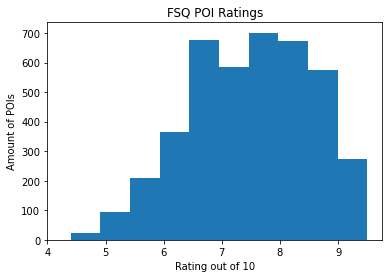

In [737]:
# looking at the ratings of POIs
fig, ax = plt.subplots()

#choosing variable
ax.hist(fsq_df['rating'])

# setting labels
ax.set_title('FSQ POI Ratings')
ax.set_xlabel('Rating out of 10')
ax.set_ylabel('Amount of POIs')

# adjusting x to start at 4, since there are no ratings below 4
ax.set_xlim(left=4)
plt.show()

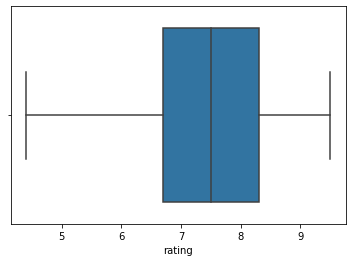

In [596]:
sns.boxplot(data=fsq_df, x='rating')
plt.show()

In [ ]:
# can see that there is definitely a right skew, with more ratings being between 6 and 9

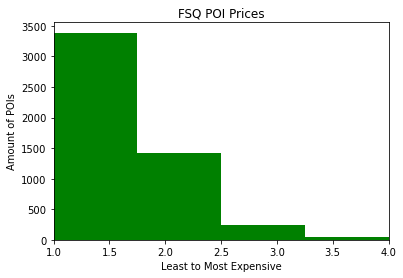

In [738]:
# looking at the price of POIs
fig, ax = plt.subplots()

#choosing variable
ax.hist(fsq_df['price'], bins = 4, color = 'green')

# setting labels
ax.set_title('FSQ POI Prices')
ax.set_xlabel('Least to Most Expensive')
ax.set_ylabel('Amount of POIs')
ax.set_xlim(left=1, right = 4)
plt.show()

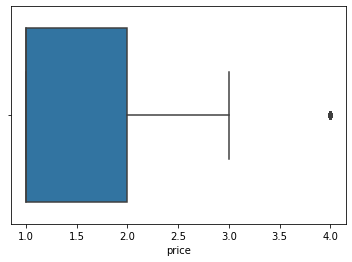

In [597]:
sns.boxplot(data=fsq_df, x='price')
plt.show()

In [ ]:
# can see a skew to the left, with many more POIs being cheap
# considering overall data, perhaps a correlation with rating vs price, with people preferring cheaper options?

In [ ]:
# looking at correlation between variables

In [564]:
fsq_df.corr()

,popularity,price,rating,distance,latitude,longitude
popularity,1.000000,0.117160,0.179574,-0.078136,-0.022736,0.022702
price,0.117160,1.000000,0.320473,-0.156178,0.061164,0.068172
rating,0.179574,0.320473,1.000000,0.014968,0.231309,0.043165
distance,-0.078136,-0.156178,0.014968,1.000000,0.007794,-0.027198
latitude,-0.022736,0.061164,0.231309,0.007794,1.000000,-0.444481
longitude,0.022702,0.068172,0.043165,-0.027198,-0.444481,1.000000


In [ ]:
# a lot of these variables don't appear to have much correlation (we can ignore lat/lon)
# but there is a small relationship between price and rating, as well as popularity and rating

<AxesSubplot:>

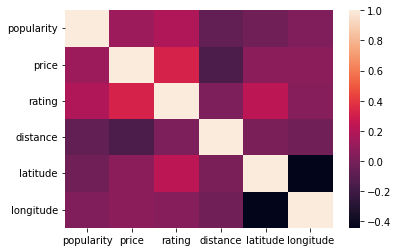

In [565]:
sns.heatmap(fsq_df.corr())

In [759]:
# this data is descrete, so using a bar chart
fig = px.histogram(
    fsq_df,
    x='price', 
    y='rating', 
    histfunc='avg',
    color_discrete_sequence=['#79e5cb'],
    labels=dict(price="price from least to most expensive", 
                rating="rating from 0 - 10"))
fig.update(layout_yaxis_range = [5,10])
fig.update_layout(
    title={
        'text': 'FSQ POI : Price vs AVG Rating',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.update_layout({'plot_bgcolor': '#dfe7ed',})
fig.show()

In [ ]:
# it does appear that there is a small correlation between rating and price
# and that higher priced restaurants have higher ratings

## Yelp

In [712]:
yelp_df = pd.read_csv('../data/yelp/yelp_df.csv')
yelp_df

,name,rating,price,distance,latitude,longitude,ll,poi_cat
0,Roy's Soul Food,3.5,$,45.728666,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Sunny Sub,3.5,$,57.372699,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Uncle Don Ray's,1.5,$,417.066004,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Southtown Sub,4.0,$,513.689635,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Baba's Famous Steak & Lemonade,2.5,$,607.730035,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
...,...,...,...,...,...,...,...,...
8315,Curbside Books & Records,3.0,$$,1278.560000,41.871467,-87.640949,41.87146651779%2C-87.6409491327,books
8316,Wicker Park Secret Agent Supply Co,4.5,$$,4390.938019,41.871467,-87.640949,41.87146651779%2C-87.6409491327,books
8317,NaN,NaN,NaN,NaN,41.761605,-87.644161,41.76160543804394%2C-87.64416097666071,books
8318,NaN,NaN,NaN,NaN,41.735820,-87.646896,41.73582%2C-87.646896,books


In [ ]:
# price is 1-4
# rating is 1-5

In [713]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       6613 non-null   object 
 1   rating     6613 non-null   float64
 2   price      6613 non-null   object 
 3   distance   6613 non-null   float64
 4   latitude   8320 non-null   float64
 5   longitude  8320 non-null   float64
 6   ll         8320 non-null   object 
 7   poi_cat    8320 non-null   object 
dtypes: float64(4), object(4)
memory usage: 520.1+ KB


In [ ]:
# 8320 entries, with 1707 nulls
# so 1707 instances of a bike location not having specific POIs within the 100m radius

In [714]:
yelp_df.describe()
# need to change price to be numbers as opposed to symbols

,rating,distance,latitude,longitude
count,6613.000000,6613.000000,8320.000000,8320.000000
mean,3.464237,649.430238,41.854739,-87.666405
std,0.957450,1865.895829,0.090692,0.054597
min,1.000000,1.549393,41.648501,-87.833817
25%,3.000000,221.007986,41.779240,-87.702021
50%,3.500000,469.128366,41.877684,-87.666589
75%,4.000000,777.666686,41.920082,-87.630876
max,5.000000,37282.422753,42.064313,-87.533531


In [715]:
# now fixing price
conditions = [
    (yelp_df["price"] == "$$$$"),
    (yelp_df["price"] == "$$$"),
    (yelp_df["price"] == "$$"),
    (yelp_df["price"] == "$")]
price_rating =[4,3,2,1]

yelp_df["price"]=np.select(conditions,price_rating)

In [716]:
# first dropping null names
yelp_df = yelp_df.dropna(subset=['name'])
yelp_df.info()
# remove 1707 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6613 entries, 0 to 8316
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       6613 non-null   object 
 1   rating     6613 non-null   float64
 2   price      6613 non-null   int32  
 3   distance   6613 non-null   float64
 4   latitude   6613 non-null   float64
 5   longitude  6613 non-null   float64
 6   ll         6613 non-null   object 
 7   poi_cat    6613 non-null   object 
dtypes: float64(4), int32(1), object(3)
memory usage: 439.1+ KB


In [719]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6613 entries, 0 to 8316
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       6613 non-null   object 
 1   rating     6613 non-null   float64
 2   price      6613 non-null   int32  
 3   distance   6613 non-null   float64
 4   latitude   6613 non-null   float64
 5   longitude  6613 non-null   float64
 6   ll         6613 non-null   object 
 7   poi_cat    6613 non-null   object 
dtypes: float64(4), int32(1), object(3)
memory usage: 439.1+ KB


In [720]:
yelp_df.describe()
# looks like there are no more odd looking results

,rating,price,distance,latitude,longitude
count,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000
mean,3.464237,1.481476,649.430238,41.861318,-87.666729
std,0.957450,0.583212,1865.895829,0.087695,0.052711
min,1.000000,1.000000,1.549393,41.648501,-87.833817
25%,3.000000,1.000000,221.007986,41.791478,-87.701054
50%,3.500000,1.000000,469.128366,41.881286,-87.666589
75%,4.000000,2.000000,777.666686,41.921540,-87.631931
max,5.000000,4.000000,37282.422753,42.064313,-87.533531


In [721]:
yelp_df.corr()
# yelp data also showing a small correlation between rating and price

,rating,price,distance,latitude,longitude
rating,1.000000,0.221653,0.089675,0.194630,-0.008294
price,0.221653,1.000000,-0.043740,0.154936,0.092205
distance,0.089675,-0.043740,1.000000,-0.121567,0.034996
latitude,0.194630,0.154936,-0.121567,1.000000,-0.434961
longitude,-0.008294,0.092205,0.034996,-0.434961,1.000000


<AxesSubplot:>

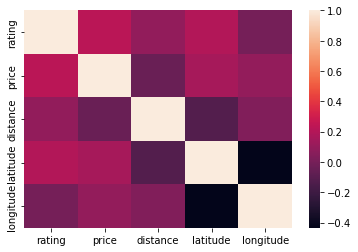

In [736]:
sns.heatmap(yelp_df.corr())

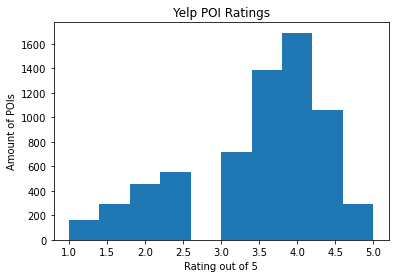

In [774]:
# looking at the ratings of POIs
fig, ax = plt.subplots()

#choosing variable
ax.hist(yelp_df['rating'])

# setting labels
ax.set_title('Yelp POI Ratings')
ax.set_xlabel('Rating out of 5')
ax.set_ylabel('Amount of POIs')

plt.show()

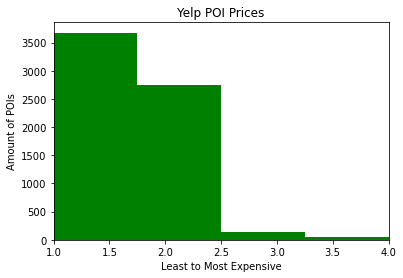

In [775]:
# looking at the price of POIs
fig, ax = plt.subplots()

#choosing variable
ax.hist(yelp_df['price'], bins = 4, color = 'green')

# setting labels
ax.set_title('Yelp POI Prices')
ax.set_xlabel('Least to Most Expensive')
ax.set_ylabel('Amount of POIs')
ax.set_xlim(left=1, right = 4)
plt.show()

In [ ]:
# showing similar results to foursquare
# i.e. more ratings for cheap POIs, as well as a skew towards higher ratings

In [773]:
# this data is descrete, so using a bar chart
fig = px.histogram(
    yelp_df,
    x='price', 
    y='rating', 
    histfunc='avg',
    color_discrete_sequence=['#79e5cb'],
    labels=dict(price="price from least to most expensive", 
                rating="rating from 0 - 5"))
fig.update(layout_yaxis_range = [3,5])
fig.update_layout(
    title={
        'text': 'Yelp POI : Price vs AVG Rating',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.update_layout({'plot_bgcolor': '#dfe7ed',})
fig.show()

# Comparing Results

## Which API provided you with more complete data? Provide an explanation. 

### Winner = Foursquare
- Overall, Foursquare provided more responses (nearly double the amount of POIs) per location. 
- Yelp's data was more intuitive, and easier to parse, but Foursquare appears to have a much larger reach for various POIs. 
- Yelp is mostly concentrated on data related to food locations, but Foursquare also returned data on things such a museums, parks, and bookstores.
- Foursquare's popularity & ratings data is also nicer to work with, as they have more of a variance in numbers (i.e. fewer whole numbers)
- Lots of Foursquare's data (ratings, popularity, etc) seemed only available to food establishments, but it still offered more complex options than Yelp

In [776]:
fsq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 13066
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11907 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       5101 non-null   float64
 3   rating      4177 non-null   float64
 4   distance    11907 non-null  float64
 5   latitude    11907 non-null  float64
 6   longitude   11907 non-null  float64
 7   ll          11907 non-null  object 
 8   poi_cat     11907 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [795]:
fsq_df.groupby(['poi_cat']).count()

,name,popularity,price,rating,distance,latitude,longitude,ll
poi_cat,,,,,,,,
books,1140,579,0,225,1140,1140,1140,1140
ice_cream,1564,1122,1082,654,1564,1564,1564,1564
museum,360,245,0,96,360,360,360,360
parks,3372,2893,0,588,3372,3372,3372,3372
restaurant,5471,4274,4019,2614,5471,5471,5471,5471


In [777]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6613 entries, 0 to 8316
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       6613 non-null   object 
 1   rating     6613 non-null   float64
 2   price      6613 non-null   int32  
 3   distance   6613 non-null   float64
 4   latitude   6613 non-null   float64
 5   longitude  6613 non-null   float64
 6   ll         6613 non-null   object 
 7   poi_cat    6613 non-null   object 
dtypes: float64(4), int32(1), object(3)
memory usage: 439.1+ KB


In [783]:
yelp_df.groupby(['poi_cat']).count()

            name  rating  price  distance  latitude  longitude    ll
poi_cat                                                             
books        361     361    361       361       361        361   361
icecream    1046    1046   1046      1046      1046       1046  1046
museums      106     106    106       106       106        106   106
parks          9       9      9         9         9          9     9
restaurant  5091    5091   5091      5091      5091       5091  5091


## Get the top 10 restaurants according to their rating

1. Picosito
2. The Crowd Theater
3. Los Primos Grocery
4. Dave's Red Hots
5. Oasis Fresh
6. Bari
7. Lost Larson
8. Publican Quality Meats (PQM)
9. Ghirardelli Ice Cream and Chocolate Shop
10. Queen Mary Tavern

In [815]:
# Top Restaurants According to Yelp
fsq_df[fsq_df['poi_cat']=='restaurant'].sort_values(by='rating', ascending=False).head(5)

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
4793,Bari,9.75,1.0,9.4,416.0,41.894556,-87.653449,41.894556%2C-87.653449,restaurant
2373,Lost Larson,9.67,1.0,9.4,66.0,41.978031,-87.668565,41.97803062248656%2C-87.66856491565704,restaurant
1310,Publican Quality Meats (PQM),9.69,2.0,9.4,119.0,41.885579,-87.648484,41.885579%2C-87.648484,restaurant
2627,Ghirardelli Ice Cream and Chocolate Shop,9.98,NaN,9.4,184.0,41.890173,-87.626185,41.890173%2C-87.626185,restaurant
2474,Queen Mary Tavern,9.72,3.0,9.4,190.0,41.903266,-87.678435,41.903266%2C-87.678435,restaurant


In [816]:
# Top Restaurants According to Foursquare
yelp_df[yelp_df['poi_cat']=='restaurant'].sort_values(by='rating', ascending=False).head(5)

,name,rating,price,distance,latitude,longitude,ll,poi_cat
2367,Picosito,5.0,2,445.848888,41.709948,-87.535365,41.709948%2C-87.535365,restaurant
2485,The Crowd Theater,5.0,1,167.592109,41.954383,-87.648043,41.954383%2C-87.648043,restaurant
4294,Los Primos Grocery,5.0,1,534.793268,41.961154,-87.716569,41.96115407569%2C-87.7165690733,restaurant
90,Dave's Red Hots,5.0,1,579.138858,41.862355,-87.715711,41.862355%2C-87.7157109,restaurant
713,Oasis Fresh,5.0,1,424.716910,41.932588,-87.636427,41.932588%2C-87.636427,restaurant


In [817]:
# comparison has lead me to pre-emptively adjust the ratings categories to both be percentages
# so that they can be merged easier later

In [823]:
fsq_df['rating'] = fsq_df['rating'] * 10 

In [825]:
yelp_df['rating'] = yelp_df['rating'] / 5 * 100 

C:\Users\annie\AppData\Local\Temp\ipykernel_13868\3036980845.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [831]:
yelp_df.loc[:,'rating']

0        70.0
1        70.0
2        30.0
3        80.0
4        50.0
        ...  
8312     70.0
8313    100.0
8314     80.0
8315     60.0
8316     90.0
Name: rating, Length: 6613, dtype: float64

In [834]:
# saving final cleaned dataframes
fsq_df.to_csv('fsq_df_final.csv', index=False)
yelp_df.to_csv('yelp_df_final.csv', index=False)